# Introducción
<div style="width: 50%; float: left;">
    <p>


El monitoreo ambiental juega un papel clave en la toma de decisiones sobre salud pública, gestión costera y sostenibilidad marina. En este contexto, el proyecto ICAM (Índice de Calidad de Aguas Marinas) se centra en recopilar, visualizar y analizar datos sobre la calidad de las aguas marinas en el territorio nacional, utilizando herramientas digitales como mapas interactivos y gráficos anuales.

Las zonas costeras en Colombia presentan diversas problemáticas ambientales, entre las principales se encuentra la inadecuada 
disposición de residuos municipales líquidos y sólidos, que generan vertimientos de aguas residuales con alta carga de contaminantes provenientes de fuentes puntuales y difusas por 
escorrentías urbanas, agrícolas o a través de los ríos que llegan al mar directamente (VivasAguas., et al. 2014; INVEMAR; 2023).

En Colombia, INVEMAR es una institución pública de investigación científica sobre temas marítimos, y se implementan programas como la REDCAM, un programa nacional de monitoreo de aguas Mmrinas y costeras, y la OE-ICAM que es un proceso estadístico que buscar proveer información estadística anual sobre el estado de la calidad de las aguas marinas y costeras en el caribe y pacífico colombiano.

A pesar de los avances en la recolección de datos, existe una marcada concentración de mediciones en ciertas zonas, lo que limita la capacidad para generar diagnósticos representativos y equitativos a nivel regional. Esta desigualdad en la cobertura dificulta la identificación oportuna de áreas críticas y la formulación de políticas eficaces.
Por tanto, este proyecto busca no solo visibilizar esta problemática, sino también facilitar su análisis a través de plataformas accesibles y visuales que promuevan la toma de decisiones basada en evidencia.

</div>

# Objetivos
<div style="width: 50%; float: left;">
    <p>Objetivo General:

Analizar la calidad del agua marina a lo largo de diferentes playas de la costa colombiana utilizando
la base de datos del ICAM, con el fin de identificar patrones de contaminación y dar estrategias  para su óptimo uso  en actividades como la pesca y la slainas, para la mejora de la gestión ambiental, y la seguridad pública.

 Objetivos Específicos:

1.  Analizar las variables relacionadas para comprender la magnitud y distribución de la contaminación  por hidrocarburos y obtener una visión general de la calidad del agua en el período de estudio.
  
2. Identificar tendencias y patrones espaciales de contaminación a lo largo del tiempo que muestren la relación entre los indicadores de calidad del agua

3. Aplicar técnicas de análisis temporal y espacial para detectar cambios en la calidad del agua a lo largo de diferentes estaciones  del año, así como posibles concentraciones de contaminación en zonas geográficas específicas utilizando mapas y gráficos
</p>


# Tabla de contenido

- [1. Carga de datos](#carga)

    - [1.1 Limpieza de datos](#limpieza)

    - [1.2 Algunos hallazgos previos y exploración de datos](#hallazgos)

- [2. Estaciones de medición](#estaciones)

- [3. Comportamiento del ICAM](#icam)

    - [3.1 Concentraicon anual de cada contaminante](#promedio)

    - [3.2. Calidad anual del ICAM por contaminante. Mejora o empeora?](#departamento)

    - [3.3. Que estaciones tienen mas contaminacion y menos contaminacion por año y en promedio](#calidad) 

- [4. Concentración anual de cada contaminante](#concentracion)

- [5. Evaluacion anual de cada contaminante](#evaluacion)

- [6. Matriz de correlacion. ¿Qué variable está más asociada a un bajo ICAM?](#matriz)

    - [6.1 Correlación entre contaminantes y el ICAM](#correlacion)

- [7. Dispersión de estaciones vs calidad del agua.](#dispersion)

- [8. Mapa de georeferenciacion de las estaciones.](#mapa)

- [9. ¿Mayor número de variables medidas implica mejor "confianza" en el ICAM?](#confianza)

    - [9.1 Gráfica Scatter plot entre num_variables vs confianza](#variables)

    - [9.2 Numero de variables por año](#confianza2)

    - [9.3 Distribucion anual del numero de variables](#cajas)

- [10. Valores extremos o atípicos](#picos)

- [11. Conclusiones](#conclusiones)

    - [11.1 Recomendaciones](#recomendaciones)
   

<h3 id="carga">1. Carga de datos</h3>

In [16]:
### importar librerias necesarias 
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
!pip install scikit-learn        ## para realizar imputacion de datos KNN
!pip install folium

## Cargar la base de datos y ver las primeras filas con head 
df_icam = pd.read_csv(r'C:\Users\CATALINA\OneDrive\Desktop\proyectoICAM\ReporteICAM.csv') 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\CATALINA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '##': Expected package name at the start of dependency specifier
    ##
    ^


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\CATALINA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
df_icam.head()

ano muestreo departamento             estacion     coduer        sustrato  \
0  2018  2018--2    ATLANTICO  Bocas de Ceniza (B)  C08001003  Agua Estuarina   
1  2018  2018--1    ATLANTICO            C. Balboa  C08002011  Agua Estuarina   
2  2018  2018--2    ATLANTICO            C. Balboa  C08002011  Agua Estuarina   
3  2018  2018--1    ATLANTICO  C. Mallorquin-Playa  C08003042  Agua Estuarina   
4  2018  2018--2    ATLANTICO  C. Mallorquin-Playa  C08003042  Agua Estuarina   

     latitud   longitud  ca_cla  ca_cte  ...   hdd     no3    od    ph    po4  \
0  11.104833 -74.853778   84.38   23.94  ...  0.24   234.0  5.41  7.31   42.0   
1  10.984842 -74.965589   21.19   93.86  ...  0.18    -1.0  8.76  8.31    7.0   
2  10.984842 -74.965589   47.18   82.66  ...  0.16    12.9  9.42  8.25   -1.0   
3  11.036472 -74.859806   22.16     NaN  ...  0.47  6870.0  6.30  7.88  407.0   
4  11.036472 -74.859806   39.76   12.26  ...  0.31   497.0  7.25  7.93  469.0   

     sst   icam icam_calificacion num_variables confianza  
0  242.0  36.00        INADECUADA             7      0.87  
1   49.9  67.46         ACEPTABLE             6      0.78  
2  134.0  70.44          ADECUADA             6      0.75  
3   42.3  20.43            PESIMA             6      0.73  
4   51.9  19.55            PESIMA             7      0.87  

[5 rows x 39 columns]

In [18]:
## Esta base de datos tiene 1.715 filas y 39 columnas
df_icam.shape

(1715, 39)

In [19]:
df_icam.info

<bound method DataFrame.info of        ano muestreo     departamento             estacion     coduer  \
0     2018  2018--2        ATLANTICO  Bocas de Ceniza (B)  C08001003   
1     2018  2018--1        ATLANTICO            C. Balboa  C08002011   
2     2018  2018--2        ATLANTICO            C. Balboa  C08002011   
3     2018  2018--1        ATLANTICO  C. Mallorquin-Playa  C08003042   
4     2018  2018--2        ATLANTICO  C. Mallorquin-Playa  C08003042   
...    ...      ...              ...                  ...        ...   
1710  2024  2024--1  VALLE DEL CAUCA         H. Palm View  P76001008   
1711  2024  2024--1  VALLE DEL CAUCA       Hotel Medellin  P76001005   
1712  2024  2024--1  VALLE DEL CAUCA             La Barra  P76001002   
1713  2024  2024--1  VALLE DEL CAUCA      P. Juan de Dios  P76001025   
1714  2024  2024--1  VALLE DEL CAUCA           P. Magüipi  P76002027   

            sustrato    latitud   longitud  ca_cla  ca_cte  ...    hdd  \
0     Agua Estuarina  11.1048

In [20]:
df_icam.columns

Index(['ano', 'muestreo', 'departamento', 'estacion', 'coduer', 'sustrato',
       'latitud', 'longitud', 'ca_cla', 'ca_cte', 'ca_cot', 'ca_hdd', 'ca_no3',
       'ca_od', 'ca_ph', 'ca_po4', 'ca_sst', 'eval_cla', 'eval_cte',
       'eval_cot', 'eval_hdd', 'eval_no3', 'eval_od', 'eval_ph', 'eval_sst',
       'eval_po4', 'cot', 'cla', 'cte', 'hdd', 'no3', 'od', 'ph', 'po4', 'sst',
       'icam', 'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [21]:
df_icam.dtypes

ano                    int64
muestreo              object
departamento          object
estacion              object
coduer                object
sustrato              object
latitud              float64
longitud             float64
ca_cla               float64
ca_cte               float64
ca_cot               float64
ca_hdd               float64
ca_no3               float64
ca_od                float64
ca_ph                float64
ca_po4               float64
ca_sst               float64
eval_cla              object
eval_cte              object
eval_cot              object
eval_hdd              object
eval_no3              object
eval_od               object
eval_ph               object
eval_sst              object
eval_po4              object
cot                  float64
cla                  float64
cte                  float64
hdd                  float64
no3                  float64
od                   float64
ph                   float64
po4                  float64
sst           

<h3 id="limpieza">1.1 Limpieza de datos</h3>

Tenemos 239 estaciones a lo largo de la costa Colombiana, dichas estaciones recolectan muestras de entre 1 y 8 contaminate varias veces al año (1 o 4 veces)

In [22]:
icam = df_icam  ## Nuestro DF limpio se llamará icam para el resto de analisis en codigo

In [23]:
# renombramos las variables por nombres entendibles
icam.rename(columns={
    'ano':'año', 'coduer':'codigo_estacion', 'ca_cla':'calidad_clorofilaa',
    'ca_cte':'calidad_coliformes_termotolerantes', 
    'ca_cot':'calidad_carbono_organico_total', 'ca_hdd':'calidad_hdd', 
    'ca_no3':'calidad_nitratos','ca_od':'calidad_oxigeno_disuelto', 
    'ca_ph':'calidad_ph', 'ca_po4':'calidad_ortofosfatos', 
    'ca_sst':'calidad_sst', 'eval_cla':'evaluacion_clorofilaa', 
    'eval_cte':'evaluacion_coliformes_termotolerantes',
    'eval_cot':'evaluacion_carbono_organico_total', 
    'eval_hdd':'evaluacion_hdd', 'eval_no3':'evaluacion_nitratos', 
    'eval_od':'evaluacion_oxigeno_disuelto', 'eval_ph':'evaluacion_ph', 
    'eval_sst':'evaluacion_sst','eval_po4':'evaluacion_ortofosfatos', 
    'cot':'carbono_organico_total', 'cla':'clorofilaa', 
    'cte':'coliformes_termotolerantes', 'hdd':'hidrocarburos_disueltos_dispersos', 
    'no3':'nitratos', 'od':'oxigeno_disuelto', 'po4':'ortofosfatos', 
    'sst':'solidos_suspendidos_totales', 
    }
                                 , inplace = True)

In [24]:
# cambiammos el tipo de dato de algunas variables
icam = df_icam.astype({'muestreo':'category','departamento':'category',
'estacion':'category','sustrato':'category',
'evaluacion_clorofilaa':'category','evaluacion_coliformes_termotolerantes':'category',
'evaluacion_carbono_organico_total':'category','evaluacion_hdd':'category',
'evaluacion_nitratos':'category','evaluacion_oxigeno_disuelto':'category',
'evaluacion_ph':'category','evaluacion_sst':'category',
'evaluacion_ortofosfatos':'category','icam_calificacion':'category',})
icam.dtypes

año                                         int64
muestreo                                 category
departamento                             category
estacion                                 category
codigo_estacion                            object
sustrato                                 category
latitud                                   float64
longitud                                  float64
calidad_clorofilaa                        float64
calidad_coliformes_termotolerantes        float64
calidad_carbono_organico_total            float64
calidad_hdd                               float64
calidad_nitratos                          float64
calidad_oxigeno_disuelto                  float64
calidad_ph                                float64
calidad_ortofosfatos                      float64
calidad_sst                               float64
evaluacion_clorofilaa                    category
evaluacion_coliformes_termotolerantes    category
evaluacion_carbono_organico_total        category


In [25]:
### Columnas renombradas
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_carbono_organico_total',
       'calidad_hdd', 'calidad_nitratos', 'calidad_oxigeno_disuelto',
       'calidad_ph', 'calidad_ortofosfatos', 'calidad_sst',
       'evaluacion_clorofilaa', 'evaluacion_coliformes_termotolerantes',
       'evaluacion_carbono_organico_total', 'evaluacion_hdd',
       'evaluacion_nitratos', 'evaluacion_oxigeno_disuelto', 'evaluacion_ph',
       'evaluacion_sst', 'evaluacion_ortofosfatos', 'carbono_organico_total',
       'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [26]:
icam.head()

año muestreo departamento             estacion codigo_estacion  \
0  2018  2018--2    ATLANTICO  Bocas de Ceniza (B)       C08001003   
1  2018  2018--1    ATLANTICO            C. Balboa       C08002011   
2  2018  2018--2    ATLANTICO            C. Balboa       C08002011   
3  2018  2018--1    ATLANTICO  C. Mallorquin-Playa       C08003042   
4  2018  2018--2    ATLANTICO  C. Mallorquin-Playa       C08003042   

         sustrato    latitud   longitud  calidad_clorofilaa  \
0  Agua Estuarina  11.104833 -74.853778               84.38   
1  Agua Estuarina  10.984842 -74.965589               21.19   
2  Agua Estuarina  10.984842 -74.965589               47.18   
3  Agua Estuarina  11.036472 -74.859806               22.16   
4  Agua Estuarina  11.036472 -74.859806               39.76   

   calidad_coliformes_termotolerantes  ...  hidrocarburos_disueltos_dispersos  \
0                               23.94  ...                               0.24   
1                               93.86  ...                               0.18   
2                               82.66  ...                               0.16   
3                                 NaN  ...                               0.47   
4                               12.26  ...                               0.31   

   nitratos  oxigeno_disuelto    ph  ortofosfatos  \
0     234.0              5.41  7.31          42.0   
1      -1.0              8.76  8.31           7.0   
2      12.9              9.42  8.25          -1.0   
3    6870.0              6.30  7.88         407.0   
4     497.0              7.25  7.93         469.0   

   solidos_suspendidos_totales   icam icam_calificacion num_variables  \
0                        242.0  36.00        INADECUADA             7   
1                         49.9  67.46         ACEPTABLE             6   
2                        134.0  70.44          ADECUADA             6   
3                         42.3  20.43            PESIMA             6   
4                         51.9  19.55            PESIMA             7   

  confianza  
0      0.87  
1      0.78  
2      0.75  
3      0.73  
4      0.87  

[5 rows x 39 columns]

In [27]:
icam.describe()

año      latitud     longitud  calidad_clorofilaa  \
count  1715.000000  1715.000000  1715.000000         1088.000000   
mean   2020.723032     9.742268   -76.225471           70.347371   
std       2.041209     3.063488     2.709086           26.258699   
min    2018.000000     1.642861   -81.732481           21.190000   
25%    2019.000000     9.404033   -77.411713           49.820000   
50%    2021.000000    11.021056   -75.649731           78.370000   
75%    2022.000000    11.319567   -74.223054           94.475000   
max    2024.000000    13.385900   -71.981544          100.000000   

       calidad_coliformes_termotolerantes  calidad_carbono_organico_total  \
count                         1373.000000                      300.000000   
mean                            68.799876                       63.503567   
std                             33.719916                       26.197492   
min                              0.610000                       14.600000   
25%                             45.020000                       40.452500   
50%                             84.510000                       64.305000   
75%                             98.540000                       90.005000   
max                            100.000000                       98.620000   

       calidad_hdd  calidad_nitratos  calidad_oxigeno_disuelto   calidad_ph  \
count   837.000000       1032.000000               1695.000000  1695.000000   
mean     95.413023         67.105601                 80.872165    86.949038   
std       6.036562         32.422691                 14.943570    10.453862   
min      33.330000          0.180000                  1.000000     7.470000   
25%      95.010000         47.825000                 77.260000    84.470000   
50%      97.710000         85.955000                 83.140000    88.780000   
75%      98.800000         91.315000                 89.040000    92.380000   
max      99.240000         99.630000                100.000000    98.760000   

       ...  coliformes_termotolerantes  hidrocarburos_disueltos_dispersos  \
count  ...                1.484000e+03                        1280.000000   
mean   ...                1.607646e+04                          -0.041884   
std    ...                4.184946e+05                           0.874640   
min    ...               -1.000000e+00                          -1.000000   
25%    ...                4.500000e+00                          -1.000000   
50%    ...                4.900000e+01                           0.120000   
75%    ...                5.400000e+02                           0.322500   
max    ...                1.600000e+07                           8.600000   

          nitratos  oxigeno_disuelto           ph  ortofosfatos  \
count  1620.000000       1695.000000  1695.000000    1651.00000   
mean     31.256723          6.543776     8.151309      15.61472   
std     194.658194          1.309667     0.315319      94.31570   
min      -1.000000          0.360000     6.020000      -1.00000   
25%      -1.000000          6.060000     8.070000      -1.00000   
50%       4.020000          6.480000     8.172000       3.32000   
75%      20.175000          6.985000     8.280000       8.70500   
max    6870.000000         20.000000     9.930000    2100.00000   

       solidos_suspendidos_totales         icam  num_variables    confianza  
count                  1671.000000  1715.000000    1715.000000  1715.000000  
mean                     36.450916    41.297708       5.690379     0.722047  
std                      69.125339    37.206620       1.314268     0.157941  
min                      -1.000000    -1.000000       1.000000     0.120000  
25%                       7.945000    -1.000000       5.000000     0.630000  
50%                      17.600000    45.840000       6.000000     0.750000  
75%                      38.200000    78.835000       7.000000     0.870000  
max                    1604.000000    95.930000       8.000000     1.00000

In [28]:
## Identificamos valores invalidos (nulos + negativos)
## Las colunmas con un porcentaje menore al 10% serán imputados por la media, entre el 10% y el 40% serán imputados con KNN, y mayores al 40% serán eliminadas 

columnas_excluir = ['icam', 'longitud', 'latitud']    ##Columnas que quiero excluir por que es nonrmal que tengan negativos y no tienen nulos

# Seleccionar solo columnas numéricas y excluir las indeseadas
columnas_numericas = [col for col in icam.select_dtypes(include='number').columns if col not in columnas_excluir]

total_registros = len(icam)                   
porcentaje_invalidos = {}
for col in columnas_numericas:
    nulos = icam[col].isnull().sum()
    negativos = (icam[col] < 0).sum()
    porcentaje = ((nulos + negativos) / total_registros) * 100
    porcentaje_invalidos[col] = porcentaje

# Convertimos a df para ver mejor
df_invalidos = pd.DataFrame.from_dict(porcentaje_invalidos, orient='index', columns=['% valores inválidos'])
df_invalidos.sort_values('% valores inválidos', ascending=False, inplace=True)
print(df_invalidos)

                                    % valores inválidos
calidad_carbono_organico_total                82.507289
carbono_organico_total                        82.507289
calidad_hdd                                   51.195335
hidrocarburos_disueltos_dispersos             51.195335
nitratos                                      39.825073
calidad_nitratos                              39.825073
clorofilaa                                    36.559767
calidad_clorofilaa                            36.559767
ortofosfatos                                  35.276968
calidad_ortofosfatos                          35.276968
calidad_coliformes_termotolerantes            19.941691
coliformes_termotolerantes                    19.941691
calidad_sst                                    3.498542
solidos_suspendidos_totales                    3.498542
ph                                             1.166181
calidad_oxigeno_disuelto                       1.166181
calidad_ph                                     1

In [29]:
umbral_media = 10
umbral_knn = 40
reemplazos_log = {}

# Clasificación
columnas_media = [col for col, pct in porcentaje_invalidos.items() if pct < umbral_media]
columnas_knn = [col for col, pct in porcentaje_invalidos.items() if umbral_media <= pct <= umbral_knn]

# IMPUTAR CON MEDIA (<10%)
for col in columnas_media:
    n_nulos = icam[col].isnull().sum()
    n_negativos = (icam[col] < 0).sum()
    total_reemplazos = n_nulos + n_negativos

    if total_reemplazos == 0:
        continue

    media_valida = icam[icam[col] >= 0][col].mean()
    icam[col] = icam[col].apply(lambda x: media_valida if pd.isnull(x) or x < 0 else x)

    reemplazos_log[col] = {
        'metodo': 'media',
        'media_usada': media_valida,
        'valores_reemplazados': total_reemplazos
    }

    print(f"[MEDIA] Columna '{col}' - Reemplazados: {total_reemplazos}, Media usada: {media_valida:.4f}")


# IMPUTAR CON KNN (10–40%)
for col in columnas_knn:
    icam[col] = icam[col].apply(lambda x: np.nan if x < 0 else x)

if columnas_knn:
    imputer = KNNImputer(n_neighbors=5)
    icam[columnas_knn] = imputer.fit_transform(icam[columnas_knn])

    for col in columnas_knn:
        reemplazos_log[col] = {
            'metodo': 'KNN Imputer',
            'valores_reemplazados': icam[col].isnull().sum()
        }
        print(f"[KNN] Columna '{col}' - Reemplazados con KNN Imputer.")

[MEDIA] Columna 'calidad_oxigeno_disuelto' - Reemplazados: 20, Media usada: 80.8722
[MEDIA] Columna 'calidad_ph' - Reemplazados: 20, Media usada: 86.9490
[MEDIA] Columna 'calidad_sst' - Reemplazados: 60, Media usada: 75.8305
[MEDIA] Columna 'oxigeno_disuelto' - Reemplazados: 20, Media usada: 6.5438
[MEDIA] Columna 'ph' - Reemplazados: 20, Media usada: 8.1513
[MEDIA] Columna 'solidos_suspendidos_totales' - Reemplazados: 60, Media usada: 36.8130


NameError: name 'KNNImputer' is not defined

In [ ]:
## Eliminamos las columnas que tienen valores nulos mayores al 40% y agrego las dos variables tipo object asociadas a este contaminate(evaluacion_hdd y 'evaluacion_carbono_organico_total)
icam.drop(['calidad_carbono_organico_total','evaluacion_carbono_organico_total','carbono_organico_total',
           'calidad_hdd','evaluacion_hdd','hidrocarburos_disueltos_dispersos'],
             axis=1, inplace=True)

In [ ]:
icam.columns ##Verificamos que esten eliminadas

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_nitratos',
       'calidad_oxigeno_disuelto', 'calidad_ph', 'calidad_ortofosfatos',
       'calidad_sst', 'evaluacion_clorofilaa',
       'evaluacion_coliformes_termotolerantes', 'evaluacion_nitratos',
       'evaluacion_oxigeno_disuelto', 'evaluacion_ph', 'evaluacion_sst',
       'evaluacion_ortofosfatos', 'clorofilaa', 'coliformes_termotolerantes',
       'nitratos', 'oxigeno_disuelto', 'ph', 'ortofosfatos',
       'solidos_suspendidos_totales', 'icam', 'icam_calificacion',
       'num_variables', 'confianza'],
      dtype='object')

In [ ]:
icam['muestreo'] = icam['muestreo'].astype('string')  # o 'category' si tiene pocos valores únicos

<h3 id="hallazgos">1.2 Algunos hallazgos previos y exploración de datos</h3>


In [ ]:
#numero de estaciones
icam['estacion'].nunique()    #nunique

239

In [ ]:
pd.unique(df_icam['departamento'])    #12 departamentos

array(['ATLANTICO', 'BOLIVAR', 'CAUCA', 'CHOCO', 'CORDOBA', 'LA GUAJIRA',
       'MAGDALENA', 'NARIÑO', 'SAN ANDRES ISLAS', 'SUCRE',
       'VALLE DEL CAUCA', 'ANTIOQUIA'], dtype=object)

In [ ]:
df_icam['muestreo'].unique()    ### Por cada año se hacen vraios muestreos

array(['2018--2', '2018--1', '2019--1', '2019--2', '2019--3', '2019--4',
       '2020--1', '2020--2', '2021--1', '2021--2', '2022--1', '2022--2',
       '2022--3', '2023--1', '2023--2', '2024--1', '2024--2'],
      dtype=object)

In [ ]:
icam['num_variables'].sort_index(ascending=True).value_counts()

num_variables
6    569
5    392
7    388
4    184
8     88
3     61
1     20
2     13
Name: count, dtype: int64

- Hay 20 estaciones con solo una variable medida y 88 estaciones cada una con 8 variables medidas. 
- Lo mas común es que se tomen 6 variables

In [ ]:
icam['estacion'].value_counts(ascending=False)

estacion
P. Blanca               31
Muelle Riohacha         13
P. Camarones            13
P. Mayapo               13
Alcantarillado          12
                        ..
B. Caño Correa           1
Descarga PTAR            1
Haynes Cay 02            1
Haynes Cay               1
P. de los enamorados     1
Name: count, Length: 239, dtype: int64

- La estacion con mas mediciones durante el 2018 y el 2024 es P. Blanca

In [ ]:
conteo_estaciones_por_año = icam.groupby(['año', 'estacion']).size().reset_index(name='conteo')
conteo_estaciones_por_año = conteo_estaciones_por_año.sort_values(by='conteo', ascending=False)
conteo_estaciones_por_año

C:\Users\CATALINA\AppData\Local\Temp\ipykernel_1908\1474773014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_estaciones_por_año = icam.groupby(['año', 'estacion']).size().reset_index(name='conteo')


año             estacion  conteo
389   2019            P. Blanca       6
150   2018            P. Blanca       6
867   2021            P. Blanca       6
459   2019            Rocky Cay       4
363   2019  Influencia Basurero       4
...    ...                  ...     ...
182   2018      P. Pasacaballos       0
179   2018           P. Necoclí       0
1664  2024           Taganga T1       0
1647  2024          Punta Canoa       0
1645  2024         Puerto Nuevo       0

[1673 rows x 3 columns]

ESto nos dice que hay estaciones hasta con 6 mediciones por año. En este caso P.Blanca es la que realiza mas muestreos ...

In [ ]:
icam['departamento'].value_counts().reset_index(name='conteo')

departamento  conteo
0          MAGDALENA     340
1   SAN ANDRES ISLAS     253
2         LA GUAJIRA     233
3            CORDOBA     166
4            BOLIVAR     145
5              SUCRE     126
6          ATLANTICO     114
7              CAUCA      90
8              CHOCO      71
9    VALLE DEL CAUCA      70
10            NARIÑO      65
11         ANTIOQUIA      42

De los 12 departamentos, el que tiene más muestreos es el Magdalena 340 muestreos seguido de san andres con 253 muestreos

In [ ]:
icam.groupby('departamento')['estacion'].nunique().sort_values(ascending=False)

C:\Users\CATALINA\AppData\Local\Temp\ipykernel_1908\3500956423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icam.groupby('departamento')['estacion'].nunique().sort_values(ascending=False)


departamento
MAGDALENA           36
BOLIVAR             30
SAN ANDRES ISLAS    30
SUCRE               25
LA GUAJIRA          21
NARIÑO              18
CORDOBA             16
VALLE DEL CAUCA     15
ANTIOQUIA           14
ATLANTICO           13
CAUCA               12
CHOCO               12
Name: estacion, dtype: int64

Analisis:
De los 12 departamentos el que tiene más muestreos es el Magdalena con 340 muestreos y tiene sentido ya que es el departamento que tiene más numero de estaciones. 
 De los 12 departamentos, el que tiene más muestreos es el Magdalena con 340 muestreos y san andres cn 253 muestros

In [ ]:
### Uso el n-unique para contar cuántas estaciones únicas (distintas) hay por cada año
icam.groupby('año')['estacion'].nunique()

año
2018    178
2019    177
2020     86
2021    200
2022    164
2023    177
2024    185
Name: estacion, dtype: int64

In [ ]:
## Aqui podemos ver que hay varias estaciones con mas de una medicion por año
icam.groupby(['año', 'estacion']).size()

C:\Users\CATALINA\AppData\Local\Temp\ipykernel_1908\3592676962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icam.groupby(['año', 'estacion']).size()


año   estacion            
2018  003-BDB                 0
      113-BDB                 0
      200-BDB                 0
      227-BDB                 0
      239-BDB                 0
                             ..
2024  Verde Polvorin          0
      Vertimiento Gorgona     0
      Vertimiento Riohacha    1
      Yellow Moon             0
      canal Escollera         0
Length: 1673, dtype: int64

Aunque en el 2018 y el 2019 tienen mayor numero de mediciones, dichas mediciones no tienen más de 6 contaminantes analizados en sus muestras, lo que se explica en el valor de la confianza bajo, la calidad de las muestras es bajo. Es decir, son más mediciones pero de menos calidad.

La calidad de las muestras y el numero de variables tiene un incremento considerable a lo largo de los años.

En el 2020 menos muestreos quizas por el covid

______________________________________________________________________________________________________________________________________________________________________________________________
<h3 id='estaciones'>2. Estaciones de medición<h3>

In [ ]:
## Estaciones con la mejor calificacion del ICAM en los años medidos
icam_por_año = icam.groupby(['estacion', 'departamento', 'año'])['icam'].max().reset_index()
icam_por_año = icam_por_año.sort_values(by='icam', ascending=False)
icam_por_año

C:\Users\CATALINA\AppData\Local\Temp\ipykernel_1908\829590961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icam_por_año = icam.groupby(['estacion', 'departamento', 'año'])['icam'].max().reset_index()


estacion      departamento   año   icam
8686           F. valle             CHOCO  2024  95.93
10516         Isla Baru           BOLIVAR  2020  95.00
8006           F. Saija             CAUCA  2023  94.77
3260   Cabeza de Morgan  SAN ANDRES ISLAS  2023  94.74
5750         F. Cispata           CORDOBA  2021  94.67
...                 ...               ...   ...    ...
20071   canal Escollera   VALLE DEL CAUCA  2020    NaN
20072   canal Escollera   VALLE DEL CAUCA  2021    NaN
20073   canal Escollera   VALLE DEL CAUCA  2022    NaN
20074   canal Escollera   VALLE DEL CAUCA  2023    NaN
20075   canal Escollera   VALLE DEL CAUCA  2024    NaN

[20076 rows x 4 columns]

<div style="width: 50%; float: left;">
 <p>Las estaciones con mediciones mas altas pueden llegar hasta 95.93 valores del ICAM, estos son valores muy altos teniendo en cuenta que 100 es la calificacion mas alta.
 
 La estacion con mayor registro de ICAM a lo largo de los años es "F. val"le en el CHOCÓ en el 2024 con un valor de 95.93 </p>
</div>


In [ ]:
## Estacion con ICAM mas alto en promedio
estacion_departamento = icam[['estacion', 'departamento']].drop_duplicates()
icam_por_estacion = icam.groupby('estacion')['icam'].mean().reset_index()
# Unir ambos DataFrames para agregar el departamento
icam_por_estacion = icam_por_estacion.merge(estacion_departamento, on='estacion')
icam_por_estacion = icam_por_estacion.sort_values(by='icam', ascending=False)

icam_por_estacion

C:\Users\CATALINA\AppData\Local\Temp\ipykernel_1908\338780138.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icam_por_estacion = icam.groupby('estacion')['icam'].mean().reset_index()


estacion   icam      departamento
123       Hotel Playa Mar  85.58             SUCRE
0                 003-BDB  83.95   VALLE DEL CAUCA
47   Coveñas Puntepiedras  83.71             SUCRE
195       P. Tierra Bomba  83.69           BOLIVAR
198              P. Turbo  83.16         ANTIOQUIA
..                    ...    ...               ...
136             Matatigre  -1.00             SUCRE
118         Haynes Cay 02  -1.00  SAN ANDRES ISLAS
204       Parque Acuático  -1.00         MAGDALENA
202  P. de los enamorados  -1.00  SAN ANDRES ISLAS
216           Punta Canoa  -1.00           BOLIVAR

[242 rows x 3 columns]

En promedio, la estación con mejor ICAM (mejor calidad de agua) durante los 7 años medidos en promedio es la estacion Hotel "Playa Mar" con un promedio de 85.58 en SUCRE.

________________________________________________________________________________________________________________________________________________________________________________________________
<h3 id="icam">3. Comportamiento del ICAM</h3>
Criterio para analizar el ICAM

![image](image.png)


________________________________________________________________________________________________________________________________________________________________________________________________
<h3 id='promedio'>3.1. Promedio del ICAM por año </h3>

In [ ]:
# Agrupar por año y calcular el promedio de 'icam'
icam_prom_año = (icam.groupby('año')['icam'].mean().reset_index().sort_values(by='icam', ascending=False))

    año   icam
6  2024  56.49
5  2023  55.57
4  2022  52.11
3  2021  41.92
2  2020  33.38
1  2019  29.75
0  2018  28.57


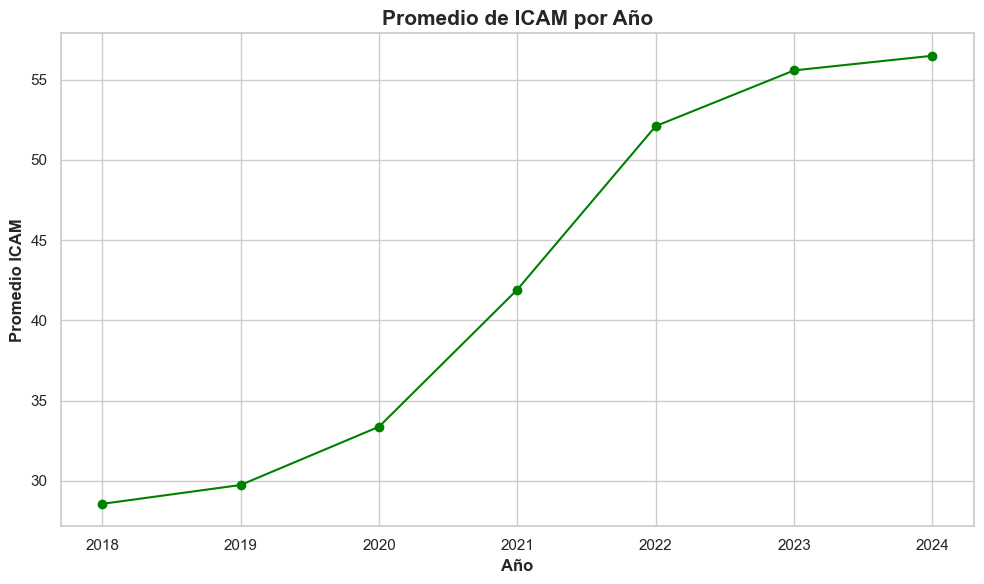

In [ ]:
# Gráfica
icam_por_año = icam.groupby('año')['icam'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(icam_por_año['año'], icam_por_año['icam'], marker='o', linestyle='-', color='green')
plt.title('Promedio de ICAM por Año', fontsize=15, fontweight='bold')
plt.xlabel('Año', fontsize=12, fontweight='bold')
plt.ylabel('Promedio ICAM', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
print(icam_prom_año)
plt.tight_layout()
plt.show()

 - El promedio de ICAM ha mostrado una tendencia ascendente constante desde 2018 hasta 2024.
 - El año con un mejor indice de calidad icam en promedio fue el 2024.  
 - 2023 y 2024 muestran un crecimiento más lento, lo que puede indicar una estabilización

<h3>____________________________________________________________________________________________________________________________________________________________________________________</h3>
<h3 id="departamento">3.2. Promedio anual del ICAM por departamento. ¿Mejora o empeora?</h3>

In [ ]:
print(icam[icam['año'] == 2024]['departamento'].unique())
print(len(icam[icam['año'] == 2024]))

['ANTIOQUIA', 'ATLANTICO', 'BOLIVAR', 'CHOCO', 'CORDOBA', ..., 'MAGDALENA', 'NARIÑO', 'SAN ANDRES ISLAS', 'SUCRE', 'VALLE DEL CAUCA']
Length: 11
Categories (12, object): ['ANTIOQUIA', 'ATLANTICO', 'BOLIVAR', 'CAUCA', ..., 'NARIÑO', 'SAN ANDRES ISLAS', 'SUCRE', 'VALLE DEL CAUCA']
201


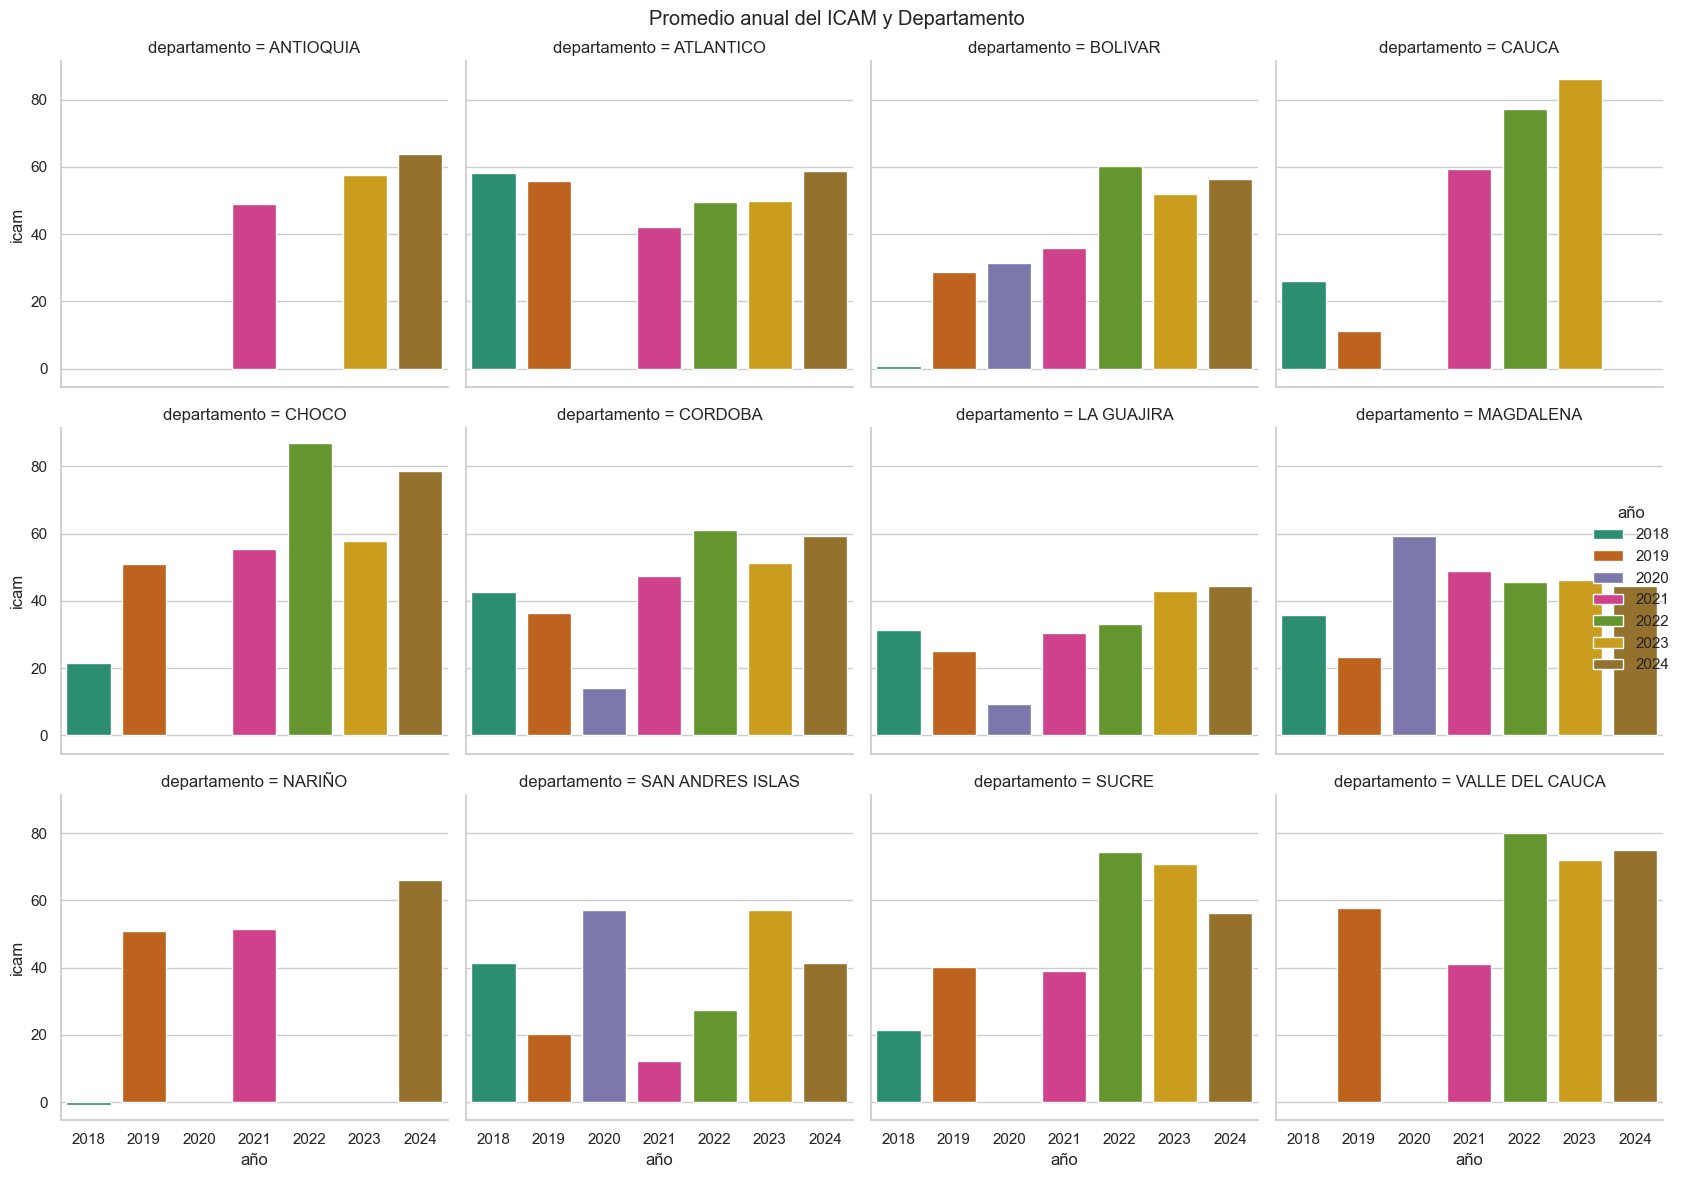

In [ ]:
icam_agrupada = icam.groupby(['departamento', 'año'])['icam'].mean().reset_index()   
departamentos = icam_agrupada['departamento'].unique()[:12]          # Lista de los primeros 12 departamentos
colors = sns.color_palette("Dark2", n_colors=len(departamentos))    # Usa una paleta de 12 colores
color_map = dict(zip(departamentos, colors))                        # Asociar un color a cada departamento

fig, axes = plt.subplots(4, 3, figsize=(15, 17), sharex=False, sharey=True)    # Crear subplots (varias grafias)
axes = axes.flatten()

for i, depto in enumerate(departamentos):
    data_depto = icam_agrupada[icam_agrupada['departamento'] == depto]
    color = color_map[depto]

     # Histograma personalizado por departamento
    axes[i].bar(data_depto['año'].astype(float), data_depto['icam'], color=color)

    # Título y etiquetas 
    axes[i].tick_params(axis='x')
    axes[i].set_title(depto,  fontsize=13 , fontweight='bold')    ## fontweight para la letra en negrilla
    axes[i].set_xlabel('Año', fontweight='bold' )
    axes[i].set_ylabel('ICAM',  fontweight='bold')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y' )
    axes[i].set_axisbelow(True)
    axes[i].xaxis.grid(False)
 
# Eliminar subplots vacíos si hay menos de 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Promedio anual del ICAM y Departamento', fontsize=19, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

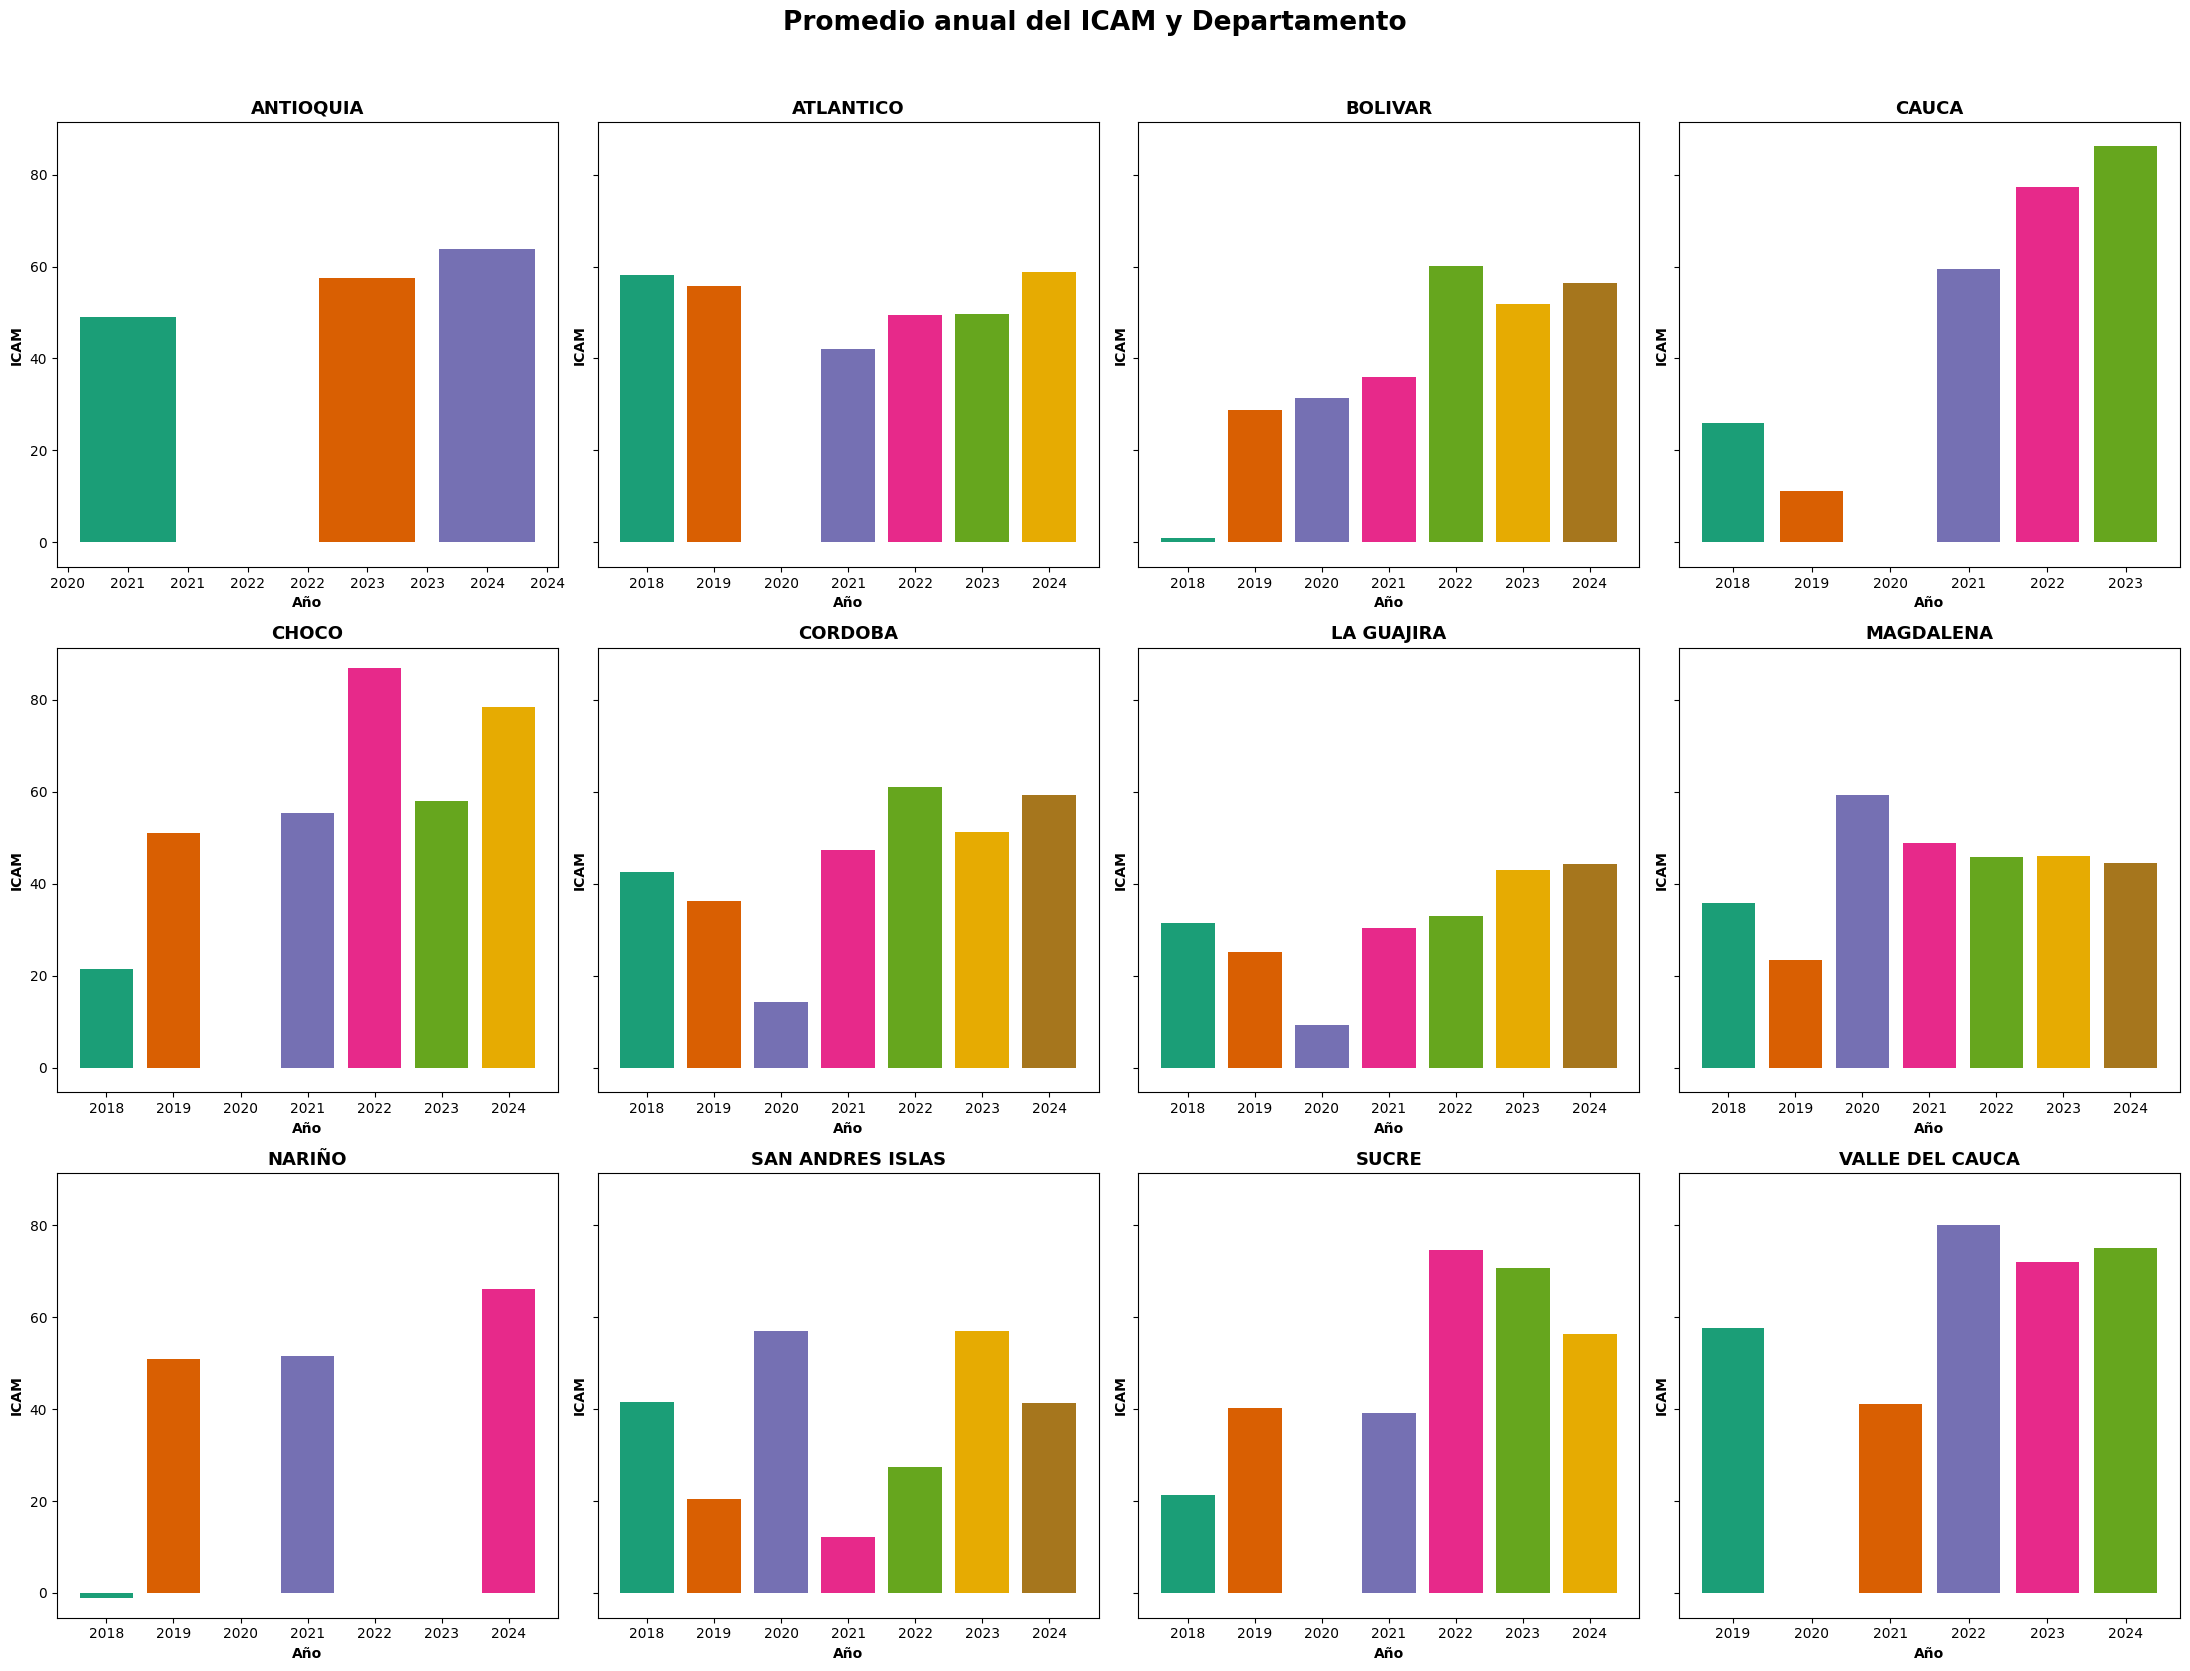

In [30]:
icam_agrupada = icam.groupby(['departamento', 'año'], observed=True)['icam'].mean().reset_index()   ##
departamentos = icam_agrupada['departamento'].unique()[:12]          # Lista de los primeros 12 departamentos
colors = sns.color_palette("Dark2", n_colors=len(departamentos))    # Usa una paleta de 12 colores
color_map = dict(zip(departamentos, colors))                        # Asociar un color a cada departamento

fig, axes = plt.subplots(3, 4, figsize=(22, 17), sharex=False, sharey=True)    # Crear subplots (varias grafias)
axes = axes.flatten()

for i, depto in enumerate(departamentos):
    data_depto = icam_agrupada[icam_agrupada['departamento'] == depto]
    color = color_map[depto]

     # Histograma personalizado por departamento
    axes[i].bar(data_depto['año'].astype(float), data_depto['icam'], color=colors)

    # Título y etiquetas 
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    axes[i].tick_params(axis='x')
    axes[i].set_title(depto,  fontsize=13 , fontweight='bold')    ## fontweight para la letra en negrilla
    axes[i].set_xlabel('Año', fontweight='bold' )
    axes[i].set_ylabel('ICAM',  fontweight='bold')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y' )
    axes[i].set_axisbelow(True)
    axes[i].xaxis.grid(False)
 
# Eliminar subplots vacíos si hay menos de 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Promedio anual del ICAM y Departamento', fontsize=19, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 - Tendencias positivas en departamentos como Bolívar, Cauca, Chocó, Sucre y Valle del Cauca, donde el ICAM ha mejorado consistentemente.
 - Atlántico y San Andrés Islas muestran variabilidad, sin una mejora sostenida.
 - Nariño y La Guajira mantienen niveles aceptables pero estables.
 - Antioquia mejora progresivamente desde 2021 hasta 2024.
 - En el  Promedio anual del ICAM por departamento hay un mejoramiento progresivo general en varios departamentos, pero otros requieren atención por sus fluctuaciones o estancamiento.


________________________________________________________________________________________________________________________________________________________________________________________________
<h3 id='calidad'>3.3 Calidad del ICAM por contaminante<h3>

In [ ]:
columnas_calidad = [col for col in icam.columns if col.startswith('calidad_')]
# Calcula la varianza de cada contaminante
varianzas = icam[columnas_calidad].var().sort_values(ascending=False)
print(varianzas)

calidad_coliformes_termotolerantes    949.35
calidad_nitratos                      747.69
calidad_clorofilaa                    505.06
calidad_sst                           469.71
calidad_ortofosfatos                  444.92
calidad_oxigeno_disuelto              220.70
calidad_ph                            108.01
dtype: float64


 - Mayor varianza → Los valores están más dispersos o que fluctúan mucho. Por ejemplo, coliformes termotolerantes varía mucho entre muestras.
 - Menor varianza → Los valores son más estables o similares entre sí. En este caso, el pH es el más constante.
 Tiene sentio 

<Figure size 1600x1000 with 0 Axes>

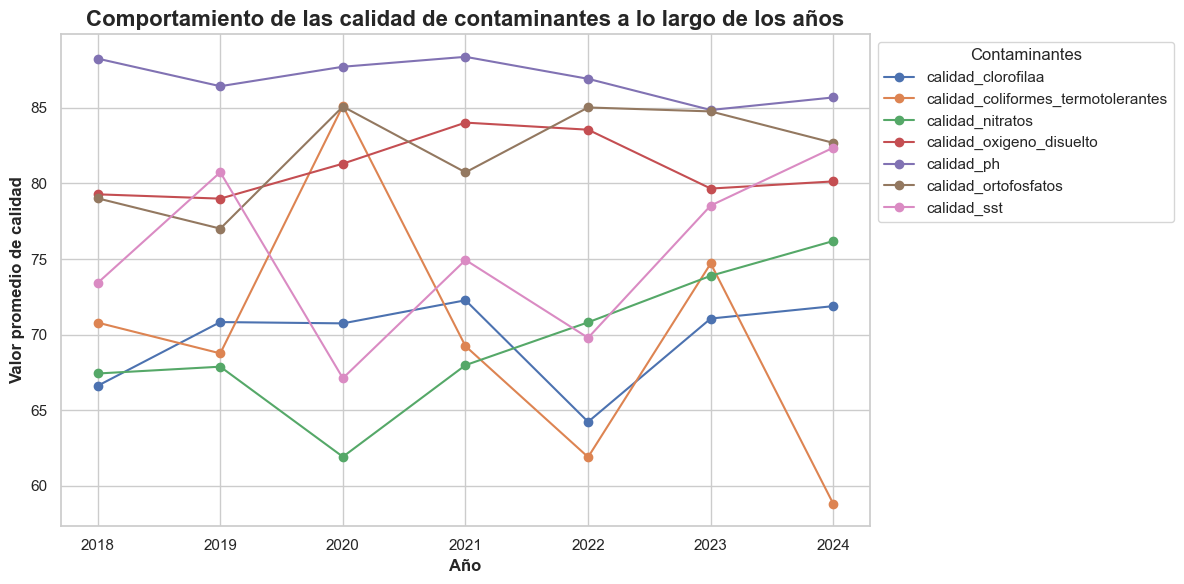

In [ ]:

columnas_calidad = [col for col in icam.columns if col.startswith('calidad')]            # Seleccionar columnas que comienzan con 'evaluacion'
icam_calidad = icam[['año'] + columnas_calidad]
icam_calidad

icam_calidad_grouped = icam_calidad.groupby('año').mean()                                # Agrupar por 'año' y calcular la media de las columnas de calidad

plt.figure(figsize=(16, 10))                                                             #  Crear un gráfico de barras para calidades por año
icam_calidad_grouped[columnas_calidad].plot(marker='o', figsize=(12, 6))     # Gráfico de barras para las columnas de calidad

# Personalizar el gráfico
plt.title('Comportamiento de las calidad de contaminantes a lo largo de los años', fontweight ='bold', fontsize=16)
plt.xlabel('Año', fontweight = 'bold')
plt.ylabel('Valor promedio de calidad', fontweight='bold')
plt.legend(title='Contaminantes', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()  

 - Calidad_oxígeno_disuelto, calidad_clorofila y calidad_ph  muestran una mejora en la calidad.
 - Esto puede reflejar políticas ambientales más eficaces, cambios en el monitoreo, o mejores prácticas industriales y agrícolas.

____________________________________________________________________________________________________________________________________________________________
<h3 id="concentracion">4. Concentración anual de cada contaminante <h3>

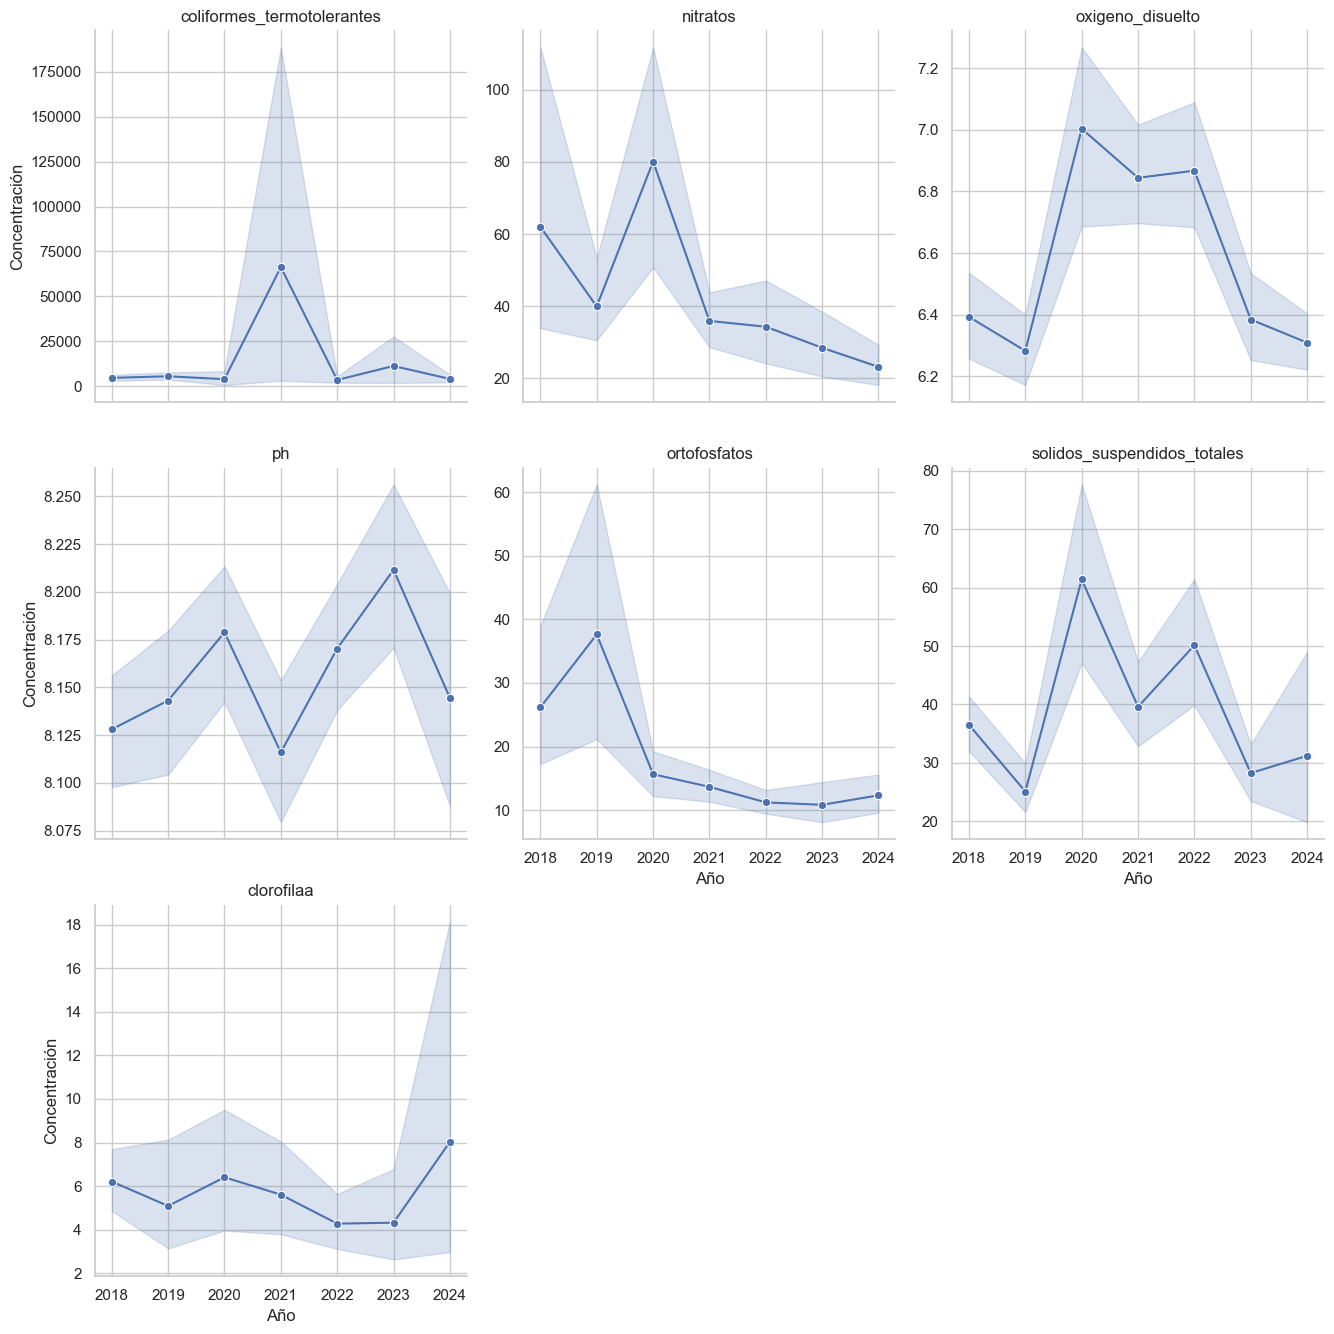

In [ ]:
#  Grafica de la concentraicon de contaminantes a lo largo de los años
contaminantes = [ 
    'coliformes_termotolerantes', 'nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa'
]
# se crea un mini df con los contaminantes y pasar a formato largo
df_plot = icam[['año'] + contaminantes] 
df_melted = df_plot.melt(id_vars='año', value_vars=contaminantes, var_name='variable', value_name='valor') ###Usa melt para poner los contaminantes en una sola columna.

# Crear 7 paneles (uno por variable)
g = sns.FacetGrid(df_melted, col='variable', col_wrap=3, sharey=False, height=4.5)  ##  sharey=False indica que cada subplot tendrá su propio eje Y independiente
g.map(sns.lineplot, 'año', 'valor', marker='o')
# Ajustes visuales
g.set_titles("{col_name}")
g.set_axis_labels("Año", "Concentración")
plt.tight_layout()
plt.show()

 - Para el año 2024, la sombra es más ancha, lo que indica mayor incertidumbre o menor cantidad de datos (menos muestreos) (aunque hubo mejor calidad de muestras)
 - En años como 2021 o 2022, la sombra es más estrecha, lo que indica más certeza o datos más consistentes.
 - La sombra que rodea la línea en ese gráfico representa el intervalo de confianza (por defecto, al 95%) alrededor de la media de los datos mostrados. 
 - La línea azul muestra la media de los valores de concentración por año.
 - La sombra azul representa la incertidumbre en torno a esa media:
 - Por defecto, es un intervalo de confianza del 95%, es decir, hay un 95% de probabilidad de que el valor real esté dentro de esa área sombreada.
 -El tamaño de la sombra depende de la variabilidad de los datos (desviación estándar) y del número de observaciones por punto.

________________________________________________________________________________________________________________________________________________________________________________________________
<h3 id='evaluacion'>3.1 Evaluacion anual de cada contaminante </h3>

In [ ]:
icam['evaluacion_clorofilaa'].unique()

['ADECUADA', 'PESIMA', 'INADECUADA', 'ACEPTABLE', 'OPTIMA', NaN]
Categories (5, object): ['ACEPTABLE', 'ADECUADA', 'INADECUADA', 'OPTIMA', 'PESIMA']

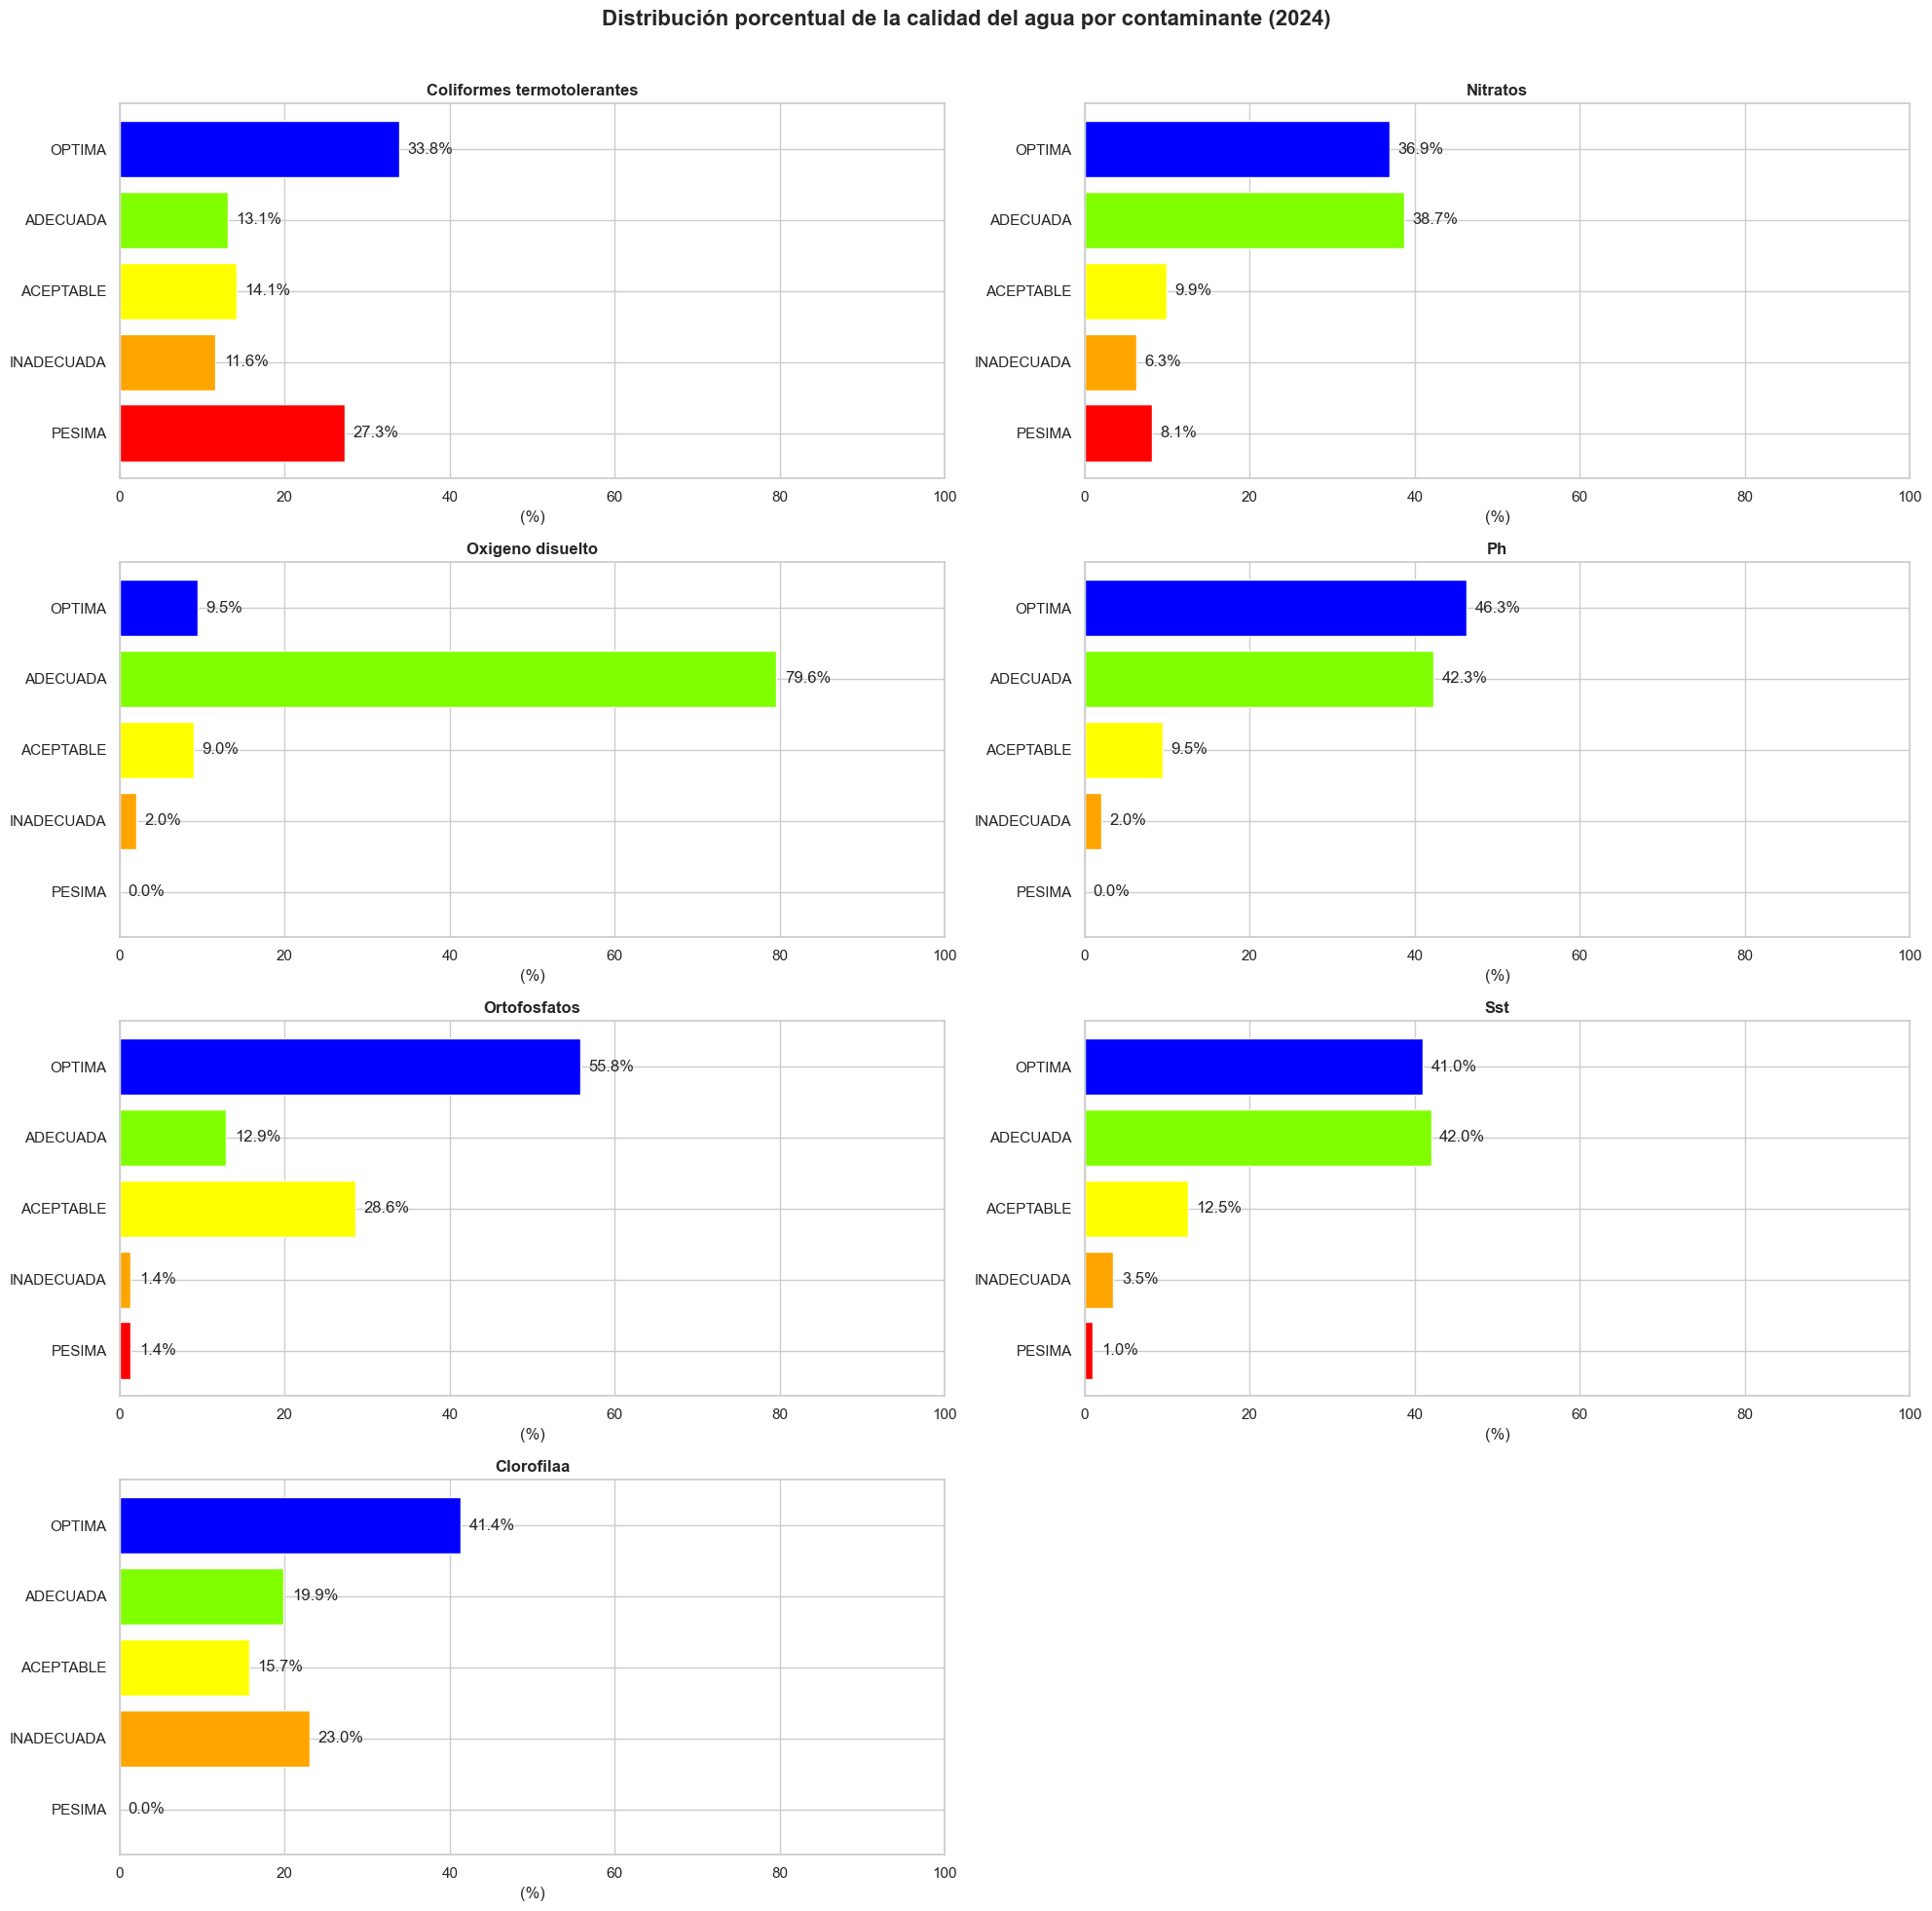

In [ ]:
colores = {
    'OPTIMA': 'blue',
    'ADECUADA': '#80FF00',
    'ACEPTABLE': 'yellow',
    'INADECUADA': 'orange',
    'PESIMA': 'red'
}

# Lista de columnas con evaluaciones
econtaminantes = [   
    'evaluacion_coliformes_termotolerantes', 'evaluacion_nitratos',
    'evaluacion_oxigeno_disuelto', 'evaluacion_ph', 
    'evaluacion_ortofosfatos', 'evaluacion_sst',
    'evaluacion_clorofilaa'
]

df_filtrado = icam[icam['año'] == 2024]   # Filtrar DataFrame
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Crear subplots
axes = axes.flatten()

# Graficar cada contaminante
for i, col_eval in enumerate(econtaminantes):
    ax = axes[i]

    if col_eval not in df_filtrado.columns:
        ax.axis('off')
        continue

    conteo = df_filtrado[col_eval].value_counts(normalize=True) * 100
    conteo = conteo.reindex(['OPTIMA', 'ADECUADA', 'ACEPTABLE', 'INADECUADA', 'PESIMA'], fill_value=0)

    bars = ax.barh(conteo.index, conteo.values, color=[colores[c] for c in conteo.index])

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

    # Título bonito usando el nombre limpio
    titulo = col_eval.replace('evaluacion_', '').replace('_', ' ').capitalize()
    ax.set_title(titulo, fontweight='bold')
    ax.set_xlim(0, 100)
    ax.invert_yaxis()
    ax.set_xlabel('(%)')

# Paneles en blanco si sobran
for j in range(len(econtaminantes), len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Distribución porcentual de la calidad del agua por contaminante (2024)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

 - Las siguiente graficas fueron análizadas solo para el año 2024 ya que es el año en el que la confianza es mas significativa. 
 - En el grafico en general, los resultados son favorables para la mayoría de los contaminantes en 2024, escepto para Coliformes termotolerantes, con una proporción elevada de evaluaciones Pésimas, y Clorofila a, que presenta cierta proporción de agua en categoría Inadecuada

 ___________________________________________________________________________________________________________________________________________________________
 <h3 id="matriz">6. Matriz de correlacion. ¿Qué variable está más asociada a un bajo ICAM?</h3>


In [ ]:
corr_variables = ['icam', 'coliformes_termotolerantes','nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa', 'confianza','num_variables']
corr = icam[corr_variables].corr()
corr

icam  coliformes_termotolerantes  nitratos  \
icam                         1.00e+00                   -3.36e-03 -5.67e-02   
coliformes_termotolerantes  -3.36e-03                    1.00e+00  5.22e-03   
nitratos                    -5.67e-02                    5.22e-03  1.00e+00   
oxigeno_disuelto             3.48e-02                   -2.03e-02  1.96e-02   
ph                          -4.69e-03                   -1.15e-02 -7.77e-02   
ortofosfatos                -6.13e-02                    4.75e-03  2.49e-01   
solidos_suspendidos_totales -7.74e-02                    4.68e-03  5.83e-02   
clorofilaa                  -2.09e-02                    1.68e-02  9.92e-02   
confianza                    6.98e-01                    2.44e-02  2.02e-02   
num_variables                7.06e-01                    2.65e-02  2.69e-02   

                             oxigeno_disuelto        ph  ortofosfatos  \
icam                                 3.48e-02 -4.69e-03     -6.13e-02   
coliformes_termotolerantes          -2.03e-02 -1.15e-02      4.75e-03   
nitratos                             1.96e-02 -7.77e-02      2.49e-01   
oxigeno_disuelto                     1.00e+00  2.13e-01     -6.97e-02   
ph                                   2.13e-01  1.00e+00     -4.40e-02   
ortofosfatos                        -6.97e-02 -4.40e-02      1.00e+00   
solidos_suspendidos_totales          1.90e-01 -3.22e-02      2.59e-02   
clorofilaa                           1.55e-01 -4.53e-02      7.92e-02   
confianza                            5.01e-04 -5.40e-02      1.02e-02   
num_variables                       -4.72e-03 -6.72e-02      1.71e-02   

                             solidos_suspendidos_totales  clorofilaa  \
icam                                           -7.74e-02       -0.02   
coliformes_termotolerantes                      4.68e-03        0.02   
nitratos                                        5.83e-02        0.10   
oxigeno_disuelto                                1.90e-01        0.15   
ph                                             -3.22e-02       -0.05   
ortofosfatos                                    2.59e-02        0.08   
solidos_suspendidos_totales                     1.00e+00        0.50   
clorofilaa                                      4.96e-01        1.00   
confianza                                       8.27e-02        0.03   
num_variables                                   8.15e-02        0.03   

                             confianza  num_variables  
icam                          6.98e-01       7.06e-01  
coliformes_termotolerantes    2.44e-02       2.65e-02  
nitratos                      2.02e-02       2.69e-02  
oxigeno_disuelto              5.01e-04      -4.72e-03  
ph                           -5.40e-02      -6.72e-02  
ortofosfatos                  1.02e-02       1.71e-02  
solidos_suspendidos_totales   8.27e-02       8.15e-02  
clorofilaa                    2.65e-02       2.59e-02  
confianza                     1.00e+00       9.94e-01  
num_variables                 9.94e-01       1.00e+00

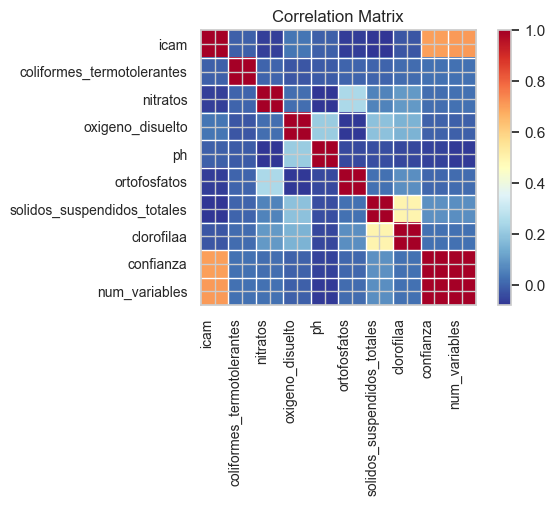

In [ ]:
## La confianza ...
sm.graphics.plot_corr(corr, xnames=list(corr.columns))   # genera una matriz de correlación tipo mapa de calor (heatmap) para todo el DataFrame
plt.xticks(rotation=90)
plt.show()

In [ ]:
icam['muestreo'].unique()

<StringArray>
['2018--2', '2018--1', '2019--1', '2019--2', '2019--3', '2019--4', '2020--1',
 '2020--2', '2021--1', '2021--2', '2022--1', '2022--2', '2022--3', '2023--1',
 '2023--2', '2024--1', '2024--2']
Length: 17, dtype: string

In [ ]:
icam_2023 = icam[icam['año'] == 2023]

# Calcular la matriz de correlación para ese año
corr_2023 = icam_2023.corr()

# Graficar
sm.graphics.plot_corr(corr_2023, xnames=list(corr_2023.columns))
plt.xticks(rotation=90)
plt.title("Matriz de Correlación - ICAM 2023")
plt.show()

ValueError: could not convert string to float: '2023--1'

 - El ICAM refleja bien la influencia de contaminantes como coliformes y nutrientes (nitratos/fosfatos), así como de parámetros
positivos como el oxígeno disuelto. Sin embargo, hay otras variables (como clorofila o pH) que no parecen tener un peso
significativo en la variabilidad del índice según esta matriz.

<h3 id='correlacion'>6.1 Correlación entre contaminantes y el ICAM</h3>

clorofilaa                    -2.09e-02
coliformes_termotolerantes    -3.36e-03
nitratos                      -5.67e-02
oxigeno_disuelto               3.48e-02
ph                            -4.69e-03
ortofosfatos                  -6.13e-02
solidos_suspendidos_totales   -7.74e-02
Name: icam, dtype: float64


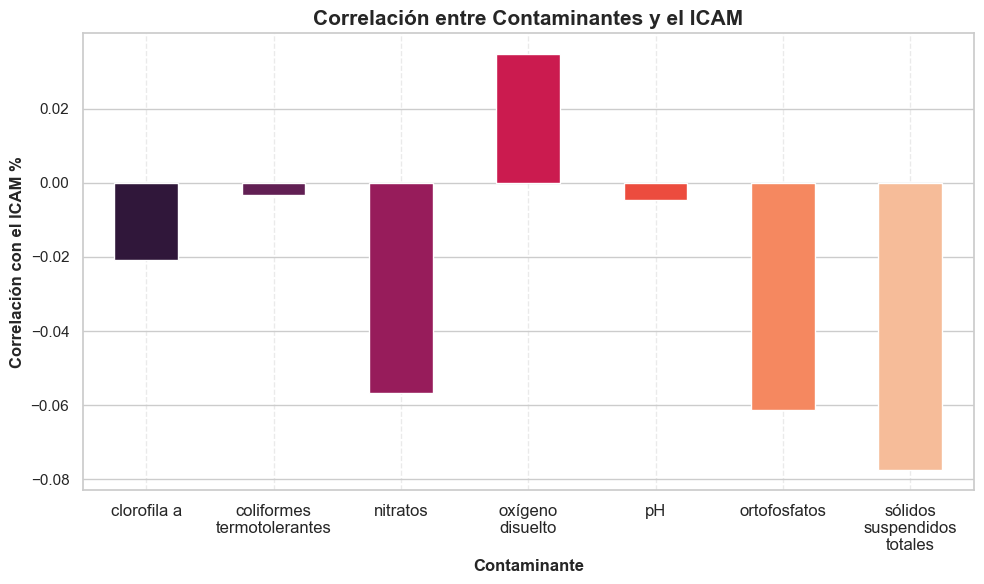

In [ ]:
# Lista de contaminantes cuantitativos
contaminantes = [
    'clorofilaa', 'coliformes_termotolerantes', 'nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos', 'solidos_suspendidos_totales'
]
etiquetas = [
    'clorofila a', 'coliformes\ntermotolerantes','nitratos','oxígeno\ndisuelto',
    'pH','ortofosfatos','sólidos\nsuspendidos\ntotales'
]
icam[contaminantes + ['icam']] = icam[contaminantes + ['icam']].apply(pd.to_numeric, errors='coerce')# Asegúrate de que los valores sean numéricos (por si hay strings o errores de lectura)

correlaciones_icam = icam[contaminantes + ['icam']].corr()                      # Calcular la matriz de correlación entre contaminantes y el 'icam'
print(correlaciones_icam.loc['icam'].drop('icam'))                              # Mostrar solo la fila de 'icam' para ver su relación con cada contaminante
correlaciones_icam_fila = correlaciones_icam.loc['icam'].drop('icam')           # Obtener solo la fila de 'icam' para ver su relación con cada contaminante

colors = sns.color_palette("rocket", len(correlaciones_icam_fila)).as_hex()  # "oviridis", "coolwarm", "mako", "rocket", etc.
# Graficar las correlaciones
plt.figure(figsize=(10, 6))
correlaciones_icam_fila.plot(kind='bar', color=colors,)
plt.xticks(ticks=range(len(etiquetas)), labels=etiquetas, rotation=0, fontsize=12)
plt.yticks(np.arange(-0.08, 0.04, 0.02))
plt.title('Correlación entre Contaminantes y el ICAM', fontweight='bold', fontsize=15)
plt.xlabel('Contaminante', fontweight='bold')
plt.ylabel('Correlación con el ICAM %',  fontweight='bold')
plt.grid(axis='x', visible=True, linestyle='--', alpha=0.4) 
plt.tight_layout()
plt.show()

- Valores positivos indican que a mayor concentración, el ICAM mejora.
- El unico que tiene correlacion positiva es el Oxigeno disuelto como es esperado en ecosistemas sanos. Es una correlacion muy baja para considerarse significativa, sin embargo, su signo positivo tiene sentido desde el punto de vista ambiental.
- Valores negativos indican que a mayor concentración del contaminante, peor es la calidad del agua (ICAM más bajo).

-- El ICAM se ve más afectado negativamente por:

 - Sólidos suspendidos totales: (~ –0.07)
 - Ort fosfatos: (~ –0.06)
 - Nitratos: Moderadamente negativa (~ –0.06)

____________________________________________________________________________________________________________________________________________________________
<h3 id="dispersion">7. Dispersión de estaciones vs calidad del agua</h3>

In [ ]:
pd.unique(icam['icam_calificacion'])

array(['INADECUADA', 'ACEPTABLE', 'ADECUADA', 'PESIMA', 'OPTIMA',
       'NO REPORTADO'], dtype=object)

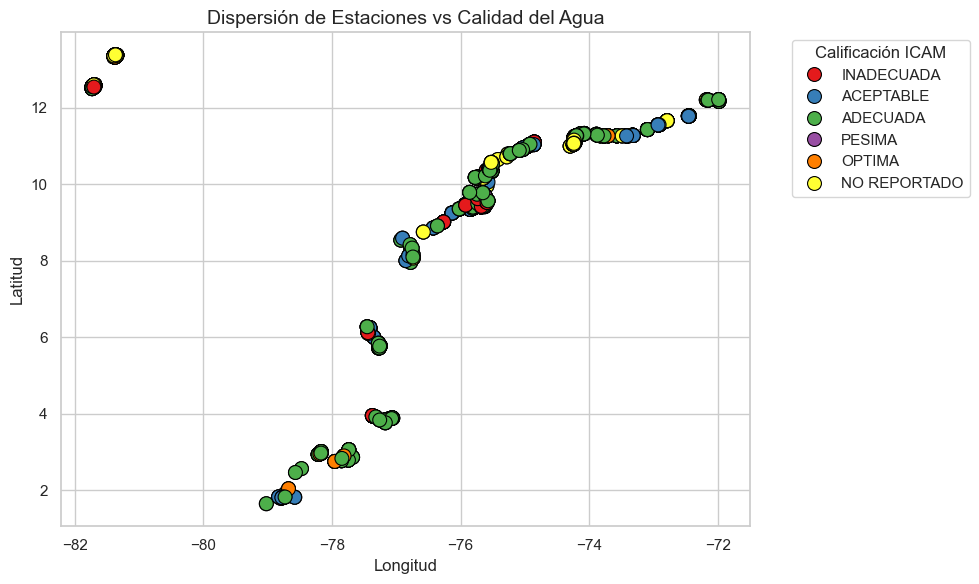

In [ ]:
#dropna elimina las filas del Df que tengan valores nulos 
df_scatter = icam.dropna(subset=['latitud', 'longitud', 'icam_calificacion'])

# 2. Crear paleta automática para todas las calificaciones únicas
calificaciones = df_scatter['icam_calificacion'].unique()  #se obtiene las calificaciones unicas de las columnas, esto genera un array con las diferentes calificaciones disponibles 
colores = sns.color_palette("Set1", n_colors=len(calificaciones))  #set es la paleta de colores por defecto de seaborn(tiene 6 paletas de colores) y len asegura que halla la misca cantidad de colores como de calificaciones 
palette = dict(zip(calificaciones, colores))   # esto empareja la cada calificacion con un color a su lado

# 3. Crear la figura
plt.figure(figsize=(10, 6))   #Esta línea configura el tamaño del gráfico con un ancho de 10 pulgadas y una altura de 6 pulgadas.
sns.scatterplot(
    data=df_scatter,
    x='longitud',
    y='latitud',
    hue='icam_calificacion',
    palette=palette,
    s=100,
    edgecolor='black'
)

# 4. Personalización
plt.title('Dispersión de Estaciones vs Calidad del Agua', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.legend(title='Calificación ICAM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- En esta gráfica se puede ver que los puntos están distribuídos según las coordenadas geográficas de la BD los cuales corresponden a puntos específicos sobre en la zona costera de Colombia (incluido SAn Andrés Islas). SE observa una de estaciones en calidad ADECUADA seguida de una calidad ACEPTABLE. Seobservan pocos puntos de INADECUADA y OPTIMA 


____________________________________________________________________________________________________________________________________________________________
<h3 id="mapa">8. Mapa de Georeferenciacion de las estaciones.</h3>

In [ ]:
###!pip install folium
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[icam.latitud.mean(), icam.longitud.mean()], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)


for i, row in icam.iterrows():                             
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],     ###Cada row es una fila del df, y puedes acceder a sus valores por nombre de columna
        radius=5,                                       ## radio del circulo en el punto de
        color='blue',                                   ###En folium.CircleMarker(), los argumentos radius y popup controlan la apariencia y la interactividad de los marcadores circulares del mapa
        fill=True,                                      ### fill en folium.CircleMarker controla si el interior del círculo estará relleno con color o no
        popup=f"Año: {row['año']}, Nitratos: {row['nitratos']}, Ortofosfatos: {row['ortofosfatos']}, Oxígeno Disuelto: {row['oxigeno_disuelto']}, pH: {row['ph']}, Sólidos Suspendidos Totales: {row['solidos_suspendidos_totales']}"###Es el texto o contenido que se muestra al hacer clic en el marcador
    ).add_to(marker_cluster)          
    from IPython.display import display              ##para poder imprimir el mapa
display(m)
m.save("mapa_icam.html")

- En este mapa cada punto representa una estación, y los círculos agrupados indican la cantidad de registros o muestras tomadas en ese sitio. El tamaño y color de los marcadores indica concentración o frecuencia de muestreo, permitiendo identificar zonas con mayor cobertura de datos.

- El mapa permite relacionar geográficamente las concentraciones de contaminantes y evaluar si ciertas áreas (por ejemplo, más cercanas a la ciudad o a zonas protegidas) presentan mayores riesgos o mejores condiciones ambientales.


____________________________________________________________________________________________________________________________________________________________
<h3 id ="confianza">9. Relación entre el número de variables medidas y la confianza </h3>

<h3 id='variables'>9.1 Numero de Estaciones vs Número de Variables Medidas</h3>

In [ ]:
num_var = icam['num_variables'].sort_index().value_counts(ascending=False) 
print(num_var)
icam['num_variables'].value_counts().sort_index().plot(kind='bar',color='seagreen')
plt.title('Numero de Estaciones vs Número de Variables Medidas', fontweight='bold', fontsize=14)
plt.xlabel('Número de Variables Medidas',fontweight='bold')
plt.ylabel('Número de Estaciones',  fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

num_variables
6    569
5    392
7    388
4    184
8     88
3     61
1     20
2     13
Name: count, dtype: int64


- Las barras nos muestran que hay mayor frecuencia en la toma de 6 variables.
- Es decir, el mayor número de estaciones (más de 550) mide 6 variables, lo cual representa la práctica más común en el monitoreo.
- Hay una concentración de estaciones midiendo entre 5 y 7 variables, y muy pocas estaciones miden solo 1, 2 o 3 variables, al igual que 8.

________________________________________________________________________________________________________________________________________________________________________________________________
<h3 id='confianza2'>9.2 Confianza según el numero de variables</h3>

In [ ]:
## Grafica de la confianza vs icam (correlacion entre confianza y num_variables)
plt.figure(figsize=(8, 7))
sns.boxplot(data=icam, x ='num_variables', y ='confianza')
plt.title('Distribución de la confianza por numero de variables', fontsize=16, fontweight='bold')
plt.xlabel('Número de variables', fontsize=14,fontweight='bold')
plt.ylabel('Confianza', fontsize=15, fontweight='bold')
plt.show()

Hallazgos:
A medida que aumenta el número de variables también lo hace la confianza.

 - Esto tiene mucho sentido: más variables ⇒ evaluación más completa ⇒ mayor confianza
 - El aumento de la mediana y el estrechamiento de los rangos sugiere una relación casi lineal entre num_variables y confianza
 - Para pocos datos (1 a 3 variables), la confianza es baja y muy variable. A partir de 5 o más variables, la confianza se estabiliza y se vuelve alta
 - Con 1 a 4 variables hay muchos outliers, lo que indica que incluso con pocos datos a veces se logra confianza alta, aunque es raro


_____________________________________________________________________________________________________________________________________________________________________________
<h3 id='cajas'>9.3 Distribución anual del Número de Variables </h3>

año
2019    335
2018    320
2021    275
2022    238
2023    220
2024    201
2020    126
Name: count, dtype: int64


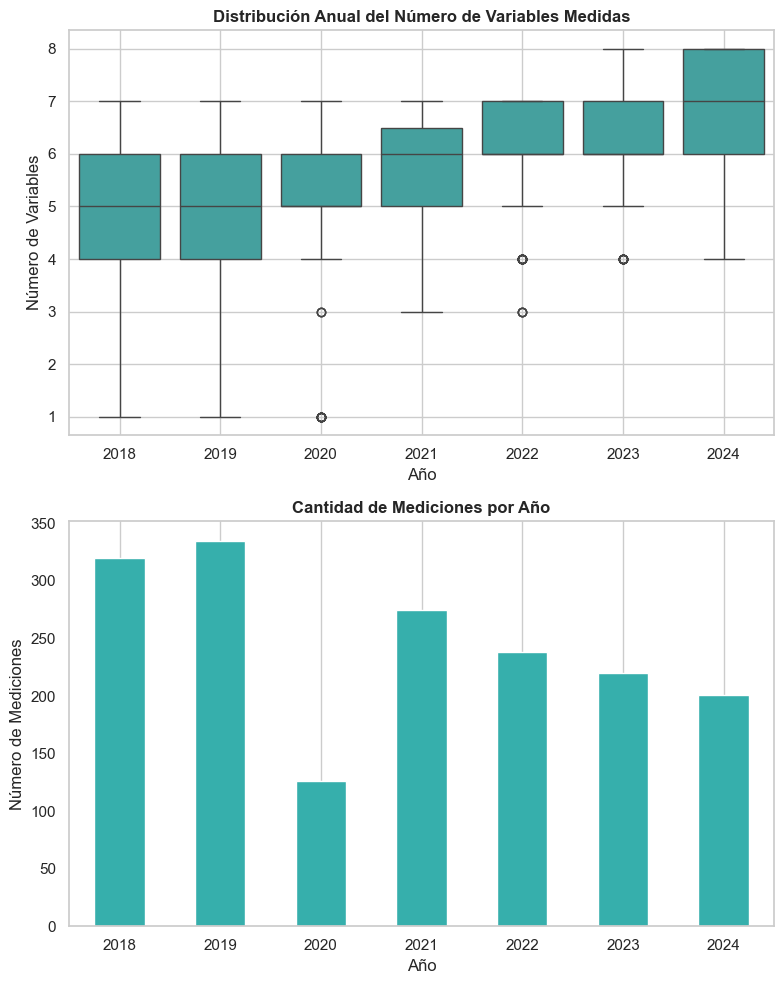

In [ ]:
# Crear la figura con 2 subplots (una arriba y una abajo)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# --------- Primera gráfica: Boxplot anual de num_variables ---------
sns.boxplot(data=icam, x='año', y='num_variables', ax=axs[0], color='#36AFAc')
axs[0].set_title('Distribución Anual del Número de Variables Medidas', fontweight='bold', fontsize=12)
axs[0].grid(True)
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Variables')

# --------- Segunda gráfica: Número de mediciones por año ---------
estaciones_año = icam['año'].value_counts()
icam['año'].value_counts().sort_index().plot(
    kind='bar', color='#36AFAc', ax=axs[1]
)
axs[1].set_title('Cantidad de Mediciones por Año', fontweight='bold', fontsize=12)
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Número de Mediciones')
axs[1].grid(axis='y')
axs[1].tick_params(axis='x', rotation=0)
print(estaciones_año)
plt.tight_layout()
plt.show()


Cada medicion por estacion tiene una o varias muestras. Aqui podemos observar que a lo largo de los años se han empezado tomar muestras de mas contaminantes (variables), lo cual mejora la confianza.
 - A lo largo de los años, se observa un incremento claro en el número de variables medidas por estación. En 2018–2020, la mediana está en 5, mientras que en 2024 ya alcanza las 7–8.
 - En los primeros años (2018–2020), la dispersión era mayor, con presencia de muchos valores atípicos hacia abajo (1–3 variables). Esta dispersión disminuye en años recientes, sugiriendo una mayor estandarización.
 - Para 2024, el rango inferior ha subido, y ya no hay estaciones midiendo solo 1–2 variables. Esto refleja mejoras en capacidad de monitoreo o políticas más estrictas de medición.

__________________________________________________________________________________________________
<h3 id="picos"> 10. Valores extremos o atipícos </h3>

In [ ]:
# Variables numéricas seleccionadas para detectar picos
variables = ["nitratos", "ortofosfatos", "oxigeno_disuelto", "ph", "solidos_suspendidos_totales"]

# Limpiar datos: eliminar valores negativos o inválidos
icam_cleaned = icam.copy()
for var in variables:
    icam_cleaned = icam_cleaned[icam_cleaned[var] >= 0]

# Función para detectar outliers usando el método IQR
def detectar_outliers(df, var):
    Q1 = df[var].quantile(0.25)  #calclua el primer cuartil de la columna, es el valor por debajo del cual se encuentra el 25% de los datos
    Q3 = df[var].quantile(0.75)  #calcula el tercer cuartil de la columna, Es el valor por debajo del cual se encuentra el 75% de los datos.
    IQR = Q3 - Q1 ##  se calcula el rango, IQR es un metodo estaditico que lo que busca es detectar valores atipicos o estremos 
    outliers = df[(df[var] < Q1 - 1.5 * IQR) | (df[var] > Q3 + 1.5 * IQR)]
    return outliers

# Detectar outliers por cada variable (por si quieres usarlo)
outliers_dict = {var: detectar_outliers(icam_cleaned, var) for var in variables}

# Mostrar los top 3 valores más altos por variable
for var in variables:
    top_valores = icam_cleaned.sort_values(by=var, ascending=False).head(3)
    print(f"\nTop 3 valores más altos de {var.upper()}:")
    print(top_valores[["año", "estacion", var]])

# Crear boxplots por año
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

for idx, var in enumerate(variables):
    sns.boxplot(data=icam_cleaned, x="año", y=var, ax=axes[idx])
    axes[idx].set_title(f'Dsistribucion de {var.upper()} por Año', fontsize=14)
    axes[idx].set_xlabel("Año")
    axes[idx].set_ylabel(var.upper())

# Eliminar gráfico vacío si hay menos variables que subplots
if len(variables) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Top 3 valores más altos de NITRATOS:
      año             estacion  nitratos
3    2018  C. Mallorquin-Playa    6870.0
325  2019  C. Mallorquin-Playa    1810.0
657  2020      Astillero Naval    1550.0

Top 3 valores más altos de ORTOFOSFATOS:
      año             estacion  ortofosfatos
325  2019  C. Mallorquin-Playa        2100.0
569  2019        Cayo Cangrejo        1905.0
324  2019  C. Mallorquin-Playa        1720.0

Top 3 valores más altos de OXIGENO_DISUELTO:
       año      estacion  oxigeno_disuelto
1087  2022  Rincon Hondo              20.0
1086  2022  Rincon Hondo              20.0
17    2018  Rincon Hondo              20.0

Top 3 valores más altos de PH:
       año       estacion    ph
1389  2023   F. río Ancho  9.93
345   2019  F. Isla Arena  9.45
1309  2023    C. Balboa 2  9.40

Top 3 valores más altos de SOLIDOS_SUSPENDIDOS_TOTALES:
       año      estacion  solidos_suspendidos_totales
1529  2024   C. Balboa 2                       1604.0
1086  2022  Rincon Hondo         

 - Nitratos & Ortofosfatos: Elevados valores atípicos en 2018–2019, con una clara disminución en los años siguientes. Esto sugiere una mejora en la calidad del agua o una mayor estandarización en el muestreo.

 - Oxígeno Disuelto: Valores medianos relativamente estables entre 6–8 mg/L, con ligeras variaciones. Se observa una disminución de valores extremos en años recientes → posible mejora en control ambiental.

 - pH: Estable a lo largo de los años (entre 8 y 8.5), sin grandes desviaciones. Indica condiciones relativamente constantes en términos de acidez/alcalinidad.

 - Sólidos Suspendidos Totales: Mayor dispersión en 2020; luego los valores se estabilizan. Las medianas bajan levemente en los últimos años → posible mejora en tratamiento o control de fuentes contaminantes.

________________________________________________________________________________
________________________________________________________________________________

<h3 id='conclusiones'>11. Conclusiones</h3>

 - A lo largo de los años se observa una mejora progresiva en la cobertura de variables monitoreadas por estación, pasando de una mediana de 5 variables en 2018–2020 a 7–8 en 2024. Esto refleja un fortalecimiento del sistema de monitoreo ambiental, con mayor capacidad técnica y exigencia normativa.

 - El aumento de variables por estación está directamente relacionado con un mayor ICAM promedio y una mayor confianza en los datos. Más variables implican una evaluación más completa, reduciendo la dispersión y la presencia de valores atípicos.

 - Existe una relación directa entre el número de variables monitoreadas y la confianza del ICAM. A partir de 5 variables, la confianza se estabiliza y es alta. En cambio, estaciones con 1–2 variables muestran baja confianza. Aun así, las estaciones tienden a monitorear entre 5 y 7 variables, lo cual representa una práctica ya común. Sin embargo, todavía existen estaciones con solo 1 a 3 variables medidas, lo que limita la confiabilidad de sus resultados.

 - Aunque se realizaron menos muestreos en años recientes, la calidad de estos mejoró. Esto sugiere que una menor cantidad de datos, si son robustos y bien medidos, puede ser más confiable.

 - Algunas estaciones con pocos datos pueden mostrar alta confianza ocasionalmente, pero en general no es lo común. La estación con mejor desempeño promedio fue “Hotel Playa Mar”, con un ICAM de 85.58 en los 7 años analizados.

 - Se identifican contaminantes como coliformes termotolerantes y clorofila-a con peores resultados en 2024, indicando problemas persistentes de contaminación microbiológica y eutrofización, respectivamente.

 - En general, los resultados para 2024 son positivos, con una mejora en la cobertura, la calidad de las mediciones y la estandarización del monitoreo.

<h3 id='recomendaciones'>11.1 Recomendaciones</h3>

 - Asegurar que las estaciones realicen mediciones de al menos 6 variables por estación para garantizar un ICAM confiable.

 - Revisar y fortalecer las estaciones que miden pocas variables para verificar que cumplan los estándares de calidad y ampliar su cobertura.

 - Priorizar el seguimiento a contaminantes con mayor frecuencia de resultados inadecuados, especialmente coliformes termotolerantes y clorofila-a.

 - Establecer umbrales mínimos de variables monitoreadas como criterio para validar o considerar confiable un índice ICAM.

 - Continuar fortaleciendo la estandarización y calidad de los datos, lo que ha demostrado impacto positivo tanto en la mejora del ICAM como en la confianza de los resultados.